# OkCupid 

My Codecademy OkCupid Machine Learning Portfolio Project from the Data Scientist Path.<br>
<br>
I divided the project in three sections:
- OKCupid ID - Data Investigation 
    - Provided data investigation
    - NLP text pre-processing
- OkCupid TF-IDF - NLP Term Frequency–Inverse Document Frequency (TF-IDF) (this section)
    - TF-IDF scores computation
    - TF-IDF terms results analysis

### + Project Goal
Using data from [OKCupid](https://www.okcupid.com/), an app that focuses on using multiple choice and short answers to match users, formulate questions and implement machine learning techniques to answer those questions.

### + Overview
In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this portfolio project, I analyze data from OKCupid, formulate questions and implement machine learning techniques to answer the questions.

### + Project Requirements
Be familiar with:

- Python3
- Machine Learning: 
     - Unsupervised Learning
     - Supervised Learning
     - Natural Language Processing
- The Python Libraries:
    - re
    - gc
    - Pandas
    - NumPy
    - Matplotlib
    - Collections
    - Sklearn
    - NLT
    - Gensim

###  + OkCupid DI project memory management
This project requires jupyter notebook to use a python 64bit version, the 32bit version will generate a [MemoryError](https://docs.python.org/3/library/exceptions.html?highlight=memoryerror#MemoryError) when manipulating the provided data.<br>
If you want to use this project code lines and you are unsured of what python bit version your Jupyter Notebook uses, you can enter the following code lines in your notebook:
```python
import struct
print(struct.calcsize("P") * 8)
```
You may also consider, increasing your Jupyter Notebook defaulted maximum memory buffer value.<br>
The Jupyter Notebook maximum memory buffer is defaulted to 536,870,912 bytes.<br>
[How to increase Jupyter notebook Memory limit?](https://stackoverflow.com/questions/57948003/how-to-increase-jupyter-notebook-memory-limit)<br>
[Configure (Jupyter notebook) file and command line options](https://jupyter-notebook.readthedocs.io/en/stable/config.html#config-file-and-command-line-options)<br>

I increased my Jupyter Notebook maximum memory buffer value to 8GB, my PC has 16GB of RAM.<br>
You need a minimum of 3GB of free RAM to run the project when using the full size of the provided data.<br>
If RAM is an issue, you may consider to use a sample of the provided data insteat of the entire size of the provided data.<br>
You can also utilize:
- [Garbage Collector interface](https://docs.python.org/3/library/gc.html) library, [Python Garbage Collection: What It Is and How It Works](https://stackify.com/python-garbage-collection/) 
- And the `del` python function, [What does “del” do exactly?](https://stackoverflow.com/questions/21053380/what-does-del-do-exactly)

### + Link
My Project Blog Presentation<br>
Project GitHub


# **OkCupid TF-IDF**
<br>

## **Term Frequency–Inverse Document Frequency (TF-IDF )**

<br>

- TF-IDF is a numerical statistic used to indicate how important a word is to each document in a collection of documents.<br><br>
- TF-IDF consists of two components, Term Frequency and Inverse Document Frequency.<br><br>   
    - Term Frequency is how often a term appears in a document.
        - TF = (Number of time the term occurs in the text) / (Total number of terms in text)
    - Inverse Document Frequency is a measure of how often a term appears across all documents of a corpus.
        - IDF = (Total number of documents / Number of documents with term t in it)<br><br>
- TF-IDF is calculated as the Term Frequency multiplied by the Inverse Document Frequency, the calculated TF-IDF  is also referred as a TF-IDF score.
    - TF-IDF = TF * IDF

<br>

In this section I answer the question: What are the most significant words for each essay feature, for each essay feature by category and by multiple categories?


## **▪ Libraries**

In [1]:
# Data manipulation tool
import pandas as pd
# Dataframe display option
pd.set_option('display.max_colwidth', None)
# Data visualization
from matplotlib import pyplot as plt
# Theme to use with matplotlib
from jupyterthemes import jtplot
jtplot.style(theme='chesterish')
# Regex
import re
# Scientific computing
import numpy as np
# ------ Natural Language Processing
#  -------------- TF-IDF
# Convert a collection of raw documents to a matrix of tf-idf scores, and BoW matrix to tf-idf scores
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
# Garbage Collector interface - https://docs.python.org/3/library/gc.html
import gc
gc.set_threshold(100, 10, 10)
#---- My Local python files
import project_library as pjl

## **▪ Text Pre-processing**
<br>

The essays features and categories descriptions:<br>
<br>
Features:

| | |
| --- | :-- |
| essay0: | My Self summary|
| essay1: | What I’m doing with my life|
| essay2: | I’m really good at|
| essay3: | The first thing people usually notice about me|
| essay4: | Favorite books, movies, show, music, and food|
| essay5: | The six things I could never do without|
| essay6: | I spend a lot of time thinking about|
| essay7: | On a typical Friday night I am|
| essay8: | The most private thing I am willing to admit|
| essay9: | You should message me if...|

<br>
Categories

| age | sex | orientation | ethnicity | pets |
|:-:|:-:|:-:|:-:|:-:|
| under 25 | female | straight | white | no-answer |
| 25 to 35 | male | gay | none_white | likes dogs and likes cats |
| 35 to 45 | | bisexual | | likes dogs and has cats |
| over 45 | | | | has dogs and likes cats |
| | | | | likes dogs and dislikes cats |
| | | | | has dogs and has cats |
| | | | | has dogs |
| | | | | has cats |

<br>
<br>
The essays are tokenize by terms and sentences, by essay features and categories.
The essays text pre-processing was completed in the <a href="OkCupid_DI.ipynb">OkCupid DI<a> section.
<br>  
<br>

### + Loading the pre-processed data

<br>

For this project, I use the the [pandas.HDFStore](https://www.kite.com/python/docs/pandas.HDFStore) class to store my DataFrames.

>[HDF5](https://www.neonscience.org/resources/learning-hub/tutorials/about-hdf5#:~:text=The%20Hierarchical%20Data%20Format%20version,with%20files%20on%20your%20computer.) is a format designed to store large numerical arrays of homogenous type. It came particularly handy when you need to organize your data models in a hierarchical fashion and you also need a fast way to retrieve the data. Pandas implements a quick and intuitive interface for this format and in this post will shortly introduce how it works. - [The Glowing Python](https://glowingpython.blogspot.com/2014/08/quick-hdf5-with-pandas.html)

In [2]:
# Opens, in append mode, pre-processed data
profiles_nlp = pd.HDFStore('data/profiles_nlp.h5')

## **▪ TF-IDF Scores Computation**
<br>

TF-IDF is calculated as the Term Frequency multiplied by the Inverse Document Frequency, the calculated TF-IDF  is also referred as a TF-IDF score.
- TF-IDF = TF * IDF

In [3]:
# Essay feature names 
essay_names = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

### + The Tfidf class:

The class computes, for each essay feature entered category(es), the n highest terms TF-IDF score, and sums the scores by terms.

Class initialization:
- Takes the attributes:
    - cat1, list data type, defaulted to [], essay category elements list
    - cat2, list data type, defaulted to [], essay category elements list
    - n, integer data type, defaulted to `'15'`, (n highest terms TF-IDF score)

- Additional attributes:
    - tfidf_scores, list of TF-IDF scores DataFrames, defaulted to []
    - tfidf_terms, list of TF-IDF terms DataFrames, defaulted to []

Class methods:
- save_scores()
- save_terms()
- display_scores_dfs()
- display_terms_dfs()

Private methods:
- \__tfidf_compute()

In [4]:
class Tfidf:
    # Global variables
    global profiles_nlp
    global essay_names
    # -------------------------------------------------------------------------------------------------------------------------------- Special methods
    # ----------------------------------------------------------------------------------- Initialization
    def __init__(self, cat1=[], cat2=[], n=15):
        '''
        Takes the arguments:
            - cat1, list data type, defaulted to [], essay category elements list
            - cat2, list data type, defaulted to [], essay category elements list
            - n, integer data type, defaulted to `'15'`, (n terms/the highest TF-IDF score)
        Checks number of category
        Calls the method tfidf_compute()
        '''
        self.cat1 = cat1
        self.cat2 = cat2
        self.n = n
        # Empty DataFrame lists
        self.tfidf_scores = []
        self.tfidf_terms = []
        # No category entered error
        if cat1 == [] and cat2 == []:
            print('------ ERROR ------\ncat1 argumnet missing')
            return
        # One category entered
        if cat2 == []:
            for c1 in cat1:
                scores, terms = self.__tfidf_compute(f'preprocessed_essays_{c1}')
                self.tfidf_scores.append(scores)
                self.tfidf_terms.append(terms)
        # Two category entered
        else:
            for c1 in cat1:
                for c2 in cat2:
                    scores, terms = self.__tfidf_compute(f'preprocessed_essays_{c1}_{c2}')
                    self.tfidf_scores.append(scores)
                    self.tfidf_terms.append(terms)
    # ----------------------------------------------------------------------------------- Representation
    def __repr__(self):
        if self.cat2 == []:
            return f'Tfidf(cat1={self.cat1}, n={self.n})'
        return f'Tfidf(cat1={self.cat1}, cat2={self.cat2}, n={self.n})'        
    # ----------------------------------------------------------------------------------- Class instance description
    def __str__(self):
        if self.cat2 == []:
            return f'The class computes, for each essay feature entered categories:\n     - {self.cat1}\nAlso computes the n={self.n} highest terms TF-IDF score, and sums the scores by terms.'
        return f'The class computes, for each essay feature entered categories:\n     - {self.cat1}\n     - {self.cat2}\n\nAlso computes the n={self.n} highest terms TF-IDF score, and sums the scores by terms.'
    # -------------------------------------------------------------------------------------------------------------------------------- Private methods
    # ----------------------------------------------------------------------------------- TF-IDF computing 
    def __tfidf_compute(self, cat):
        '''
        Takes the arguments:
            - cat, string data type, category(es) name
        Computes n highest terms TF-IDF scores for each essay feature entered category(es).
        Sums the scores by term.
        Returns:
            - a DataFrame of the summed scores with the associated terms
            - a DataFrame containing only the associated terms
        '''
        df_scores = pd.DataFrame()
        terms_tfidf = pd.DataFrame()
        for name in essay_names:
            # Initializes variable to class, empty score 
            # The max_features returns the n highest TF-IDF scores
            vectorizer = TfidfVectorizer(norm=None, max_features=self.n)
            # Fits/transforms training data and returns a score matrix 
            tfidf_scores = vectorizer.fit_transform(profiles_nlp[f'{name}_{cat}'])
            # Gets vocabulary of terms
            feature_names = vectorizer.get_feature_names()
            # Creates a DataFrame of the sum of all the n highest profile essays TF-IDF score 
            sum_tfidf = pd.DataFrame(tfidf_scores.T.todense(), index=feature_names) \
                                            .T \
                                            .sum() \
                                            .astype(int) \
                                            .sort_values(ascending = False) \
                                            .to_frame() \
                                            .reset_index() \
                                            .rename(columns={'index':'Terms', 0: 'TF-IDF'})
            # Adds the summed scores with the associated terms, tuples, to DataFrame 
            df_scores[f'{name}_{cat[20:]}'] = tuple(zip(sum_tfidf['Terms'], sum_tfidf['TF-IDF']))
            # Adds only the terms to DataFrame
            terms_tfidf[f'{name}_{cat[20:]}'] = df_scores[f'{name}_{cat[20:]}'].apply(lambda x: x[0])    
        # Names DataFrame
        df_scores.name = f'essays_{cat[20:]}_scores'
        terms_tfidf.name = f'essays_{cat[20:]}_terms'
        return df_scores, terms_tfidf
    # -------------------------------------------------------------------------------------------------------------------------------- Class methods
    # ----------------------------------------------------------------------------------- Saving TF_IDF results
    def save_scores(self):
        '''
        Saves all the TF-IDF score results by element category(es) 
        '''
        for df in self.tfidf_scores:
            df.to_csv(f'data/tfidf/{df.name}.csv')
    #
    def save_terms(self):
        '''
        Saves all the TF-IDF terms results by element category(es) 
        '''
        for df in self.tfidf_scores:
            df.to_csv(f'data/tfidf/{df.name}.csv')
    # ----------------------------------------------------------------------------------- Displaying TF_IDF results
    def display_scores_dfs(self):
        '''
        Displays all the TF-IDF scores DataFrames by element category(es) 
        '''
        for df in self.tfidf_scores:
            display(df.style.set_properties(**{'text-align': 'center'}))
    #
    def display_terms_dfs(self):
        '''
        Displays all the TF-IDF terms DataFrames by element category(es) 
        '''
        for df in self.tfidf_terms:
            display(df.style.set_properties(**{'text-align': 'center'}))

#### - Essay feature categories:
<br>

| all the categories | age_bracket | sex | sex & age_bracket | orientation | sex & orientation | age_bracket & orientation | ethnicity_w | pets | sex and pet | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| preprocessed_essays_all | preprocessed_essays_age_under25 | preprocessed_essays_f | preprocessed_essays_f_age_under25 | preprocessed_essays_straight | preprocessed_essays_f_straight | preprocessed_essays_age_under25_straight | preprocessed_essays_white | preprocessed_essays_pets_noanswer | preprocessed_essays_f_pets_noanswer |
|    | preprocessed_essays_age_25to35 | preprocessed_essays_m | preprocessed_essays_m_age_under25 | preprocessed_essays_gay | preprocessed_essays_m_straight | preprocessed_essays_age_under25_gay | preprocessed_essays_nonewhite | preprocessed_essays_pets_likesdogsandlikescats | preprocessed_essays_m_pets_noanswer |
|   | preprocessed_essays_age_36to45 |      | preprocessed_essays_f_age_25to35 | preprocessed_essays_bisexual | preprocessed_essays_f_gay | preprocessed_essays_age_under25_bisexual | | preprocessed_essays_pets_likesdogsandhascats | preprocessed_essays_f_pets_likesdogsandlikescats |
|   | preprocessed_essays_age_over45 |      | preprocessed_essays_m_age_25to35 |                              | preprocessed_essays_m_gay | preprocessed_essays_age_25to35_straight | | preprocessed_essays_pets_hasdogsandlikescats | preprocessed_essays_m_pets_likesdogsandlikescats |
|   |                                |      | preprocessed_essays_f_age_36to45 |                              | preprocessed_essays_f_bisexual | preprocessed_essays_age_25to35_gay | | preprocessed_essays_pets_likesdogsanddislikescats | preprocessed_essays_f_pets_likesdogsandhascats |
|   |                                |      | preprocessed_essays_m_age_36to45 |                              | preprocessed_essays_m_bisexual | preprocessed_essays_age_25to35_bisexual | | preprocessed_essays_pets_hasdogsandhascats | preprocessed_essays_m_pets_likesdogsandhascats |
|   |                                |      | preprocessed_essays_f_age_over45 |                         |                    |  preprocessed_essays_age_36to45_straight | | preprocessed_essays_pets_hasdogs | preprocessed_essays_f_pets_hasdogsandlikescats |
|                         |                                |                       | preprocessed_essays_m_age_over45 |                        |                    | preprocessed_essays_age_36to45_gay | | preprocessed_essays_pets_hascats | preprocessed_essays_m_pets_hasdogsandlikescats |
|      |        |        |       |           |          | preprocessed_essays_age_36to45_bisexual | |                                  | preprocessed_essays_f_pets_likesdogsanddislikescats |
|      |        |        |       |           |          | preprocessed_essays_age_over45_straight | |                                  | preprocessed_essays_m_pets_likesdogsanddislikescats |
|      |        |        |       |           |          |preprocessed_essays_age_over45_gay |  |                                 | preprocessed_essays_f_pets_hasdogsandhascats |
|      |        |        |       |           |          | preprocessed_essays_age_over45_bisexual |  |                                 | preprocessed_essays_m_pets_hasdogsandhascats | 
|      |        |        |       |           |          |  | |                                   | preprocessed_essays_f_pets_hasdogs |
|      |        |        |       |           |          |       |                                 |  | preprocessed_essays_m_pets_hasdogs |
|      |        |        |       |           |          |       |                                |   | preprocessed_essays_f_pets_hascats |
|      |        |        |       |           |          |       |                                 |  | preprocessed_essays_m_pets_hascats |

### + Most significant  terms all categories

For this exercise the TF-IDF documents are the all pre-processed profile essays by essay feature.

In [5]:
# Initializes 
essays_all = Tfidf(['all'])
# Display results
essays_all.display_scores_dfs()
essays_all.display_terms_dfs()
# Stores results
essays_all.save_scores()
essays_all.save_terms()

### + Most significant  terms 'age_bracket' category

For this exercise the TF-IDF documents are the all pre-processed profile essays by essay feature and by age_bracket.

In [6]:
age_bracket_names = ['age_under25', 'age_25to35', 'age_36to45', 'age_over45']
# Initializes 
essays_ages = Tfidf(age_bracket_names)
# Displays results terms only
essays_ages.display_terms_dfs()
# Stores results
essays_ages.save_scores()
essays_ages.save_terms()

### + Most significant  terms 'sex'  category

For this exercise the TF-IDF documents are the all pre-processed profile essays by essay feature and by sex.

In [7]:
sex_names = ['f', 'm']
# Initializes 
essays_sexes = Tfidf(sex_names)
# Stores results
essays_sexes.save_scores()
essays_sexes.save_terms()

### + Most significant  terms 'sex' and 'age_bracket' categories

For this exercise the TF-IDF documents are the all pre-processed profile essays by essay feature, by sex and by age_bracket.

In [8]:
# Initializes 
essays_sexes_ages = Tfidf(sex_names, age_bracket_names)
# Stores results
essays_sexes_ages.save_scores()
essays_sexes_ages.save_terms()

### + Most significant  terms 'orientation' category

For this exercise the TF-IDF documents are the all pre-processed profile essays by essay feature and by orientation.

In [9]:
orientation_names = ['straight', 'gay', 'bisexual']
# Initializes 
essays_orientations = Tfidf(orientation_names)
# Stores results
essays_orientations.save_scores()
essays_orientations.save_terms()

### + Most significant  terms 'sex' and  'orientation' categories

For this exercise the TF-IDF documents are the all pre-processed profile essays by essay feature, by sex and by orientation.

In [10]:
# Initializes 
essays_sexes_orientations = Tfidf(sex_names, orientation_names)
# Stores results
essays_sexes_orientations.save_scores()
essays_sexes_orientations.save_terms()

### + Most significant  terms 'age_bracket' and  'orientation' categories

For this exercise the TF-IDF documents are the all pre-processed profile essays by essay feature, by age and by orientation.

In [11]:
# Initializes 
essays_ages_orientations = Tfidf(age_bracket_names, orientation_names)
# Stores results
essays_ages_orientations.save_scores()
essays_ages_orientations.save_terms()

### + Most significant  terms 'ethnicity_w' category

For this exercise the TF-IDF documents are the all pre-processed profile essays by essay feature and by ethnicity white or none white.

In [12]:
ethnicity_w_names = ['white', 'nonewhite']
# Initializes 
essays_ethnicities = Tfidf(ethnicity_w_names)
# Stores results
essays_ethnicities.save_scores()
essays_ethnicities.save_terms()

### + Most significant  terms 'pets' category

For this exercise the TF-IDF documents are the all pre-processed profile essays by essay feature and by pets.

In [13]:
pets_names = ['pets_noanswer',
              'pets_likesdogsandlikescats',
              'pets_likesdogsandhascats',
              'pets_hasdogsandlikescats',
              'pets_likesdogsanddislikescats',
              'pets_hasdogsandhascats',
              'pets_hasdogs',
              'pets_hascats']
# Initializes 
essays_pets = Tfidf(pets_names)
# Stores results
essays_pets.save_scores()
essays_pets.save_terms()

### + Most significant  terms 'sex' and  'pets' categories

For this exercise the TF-IDF documents are the all pre-processed profile essays by essay feature, by sex and by pets.

In [14]:
# Initializes 
essays_sexes_pets = Tfidf(sex_names, pets_names)
# Stores results
essays_sexes_pets.save_scores()
essays_sexes_pets.save_terms()

##  **▪ TF-IDF Terms Results Analysis**
<br>

In this section I analyze the similarity between sets of two TF-IDF terms results lists.

## + The Similarity class:

The class computes the similarity percentage between two essay terms lists of a `Tfidf` class instance.

<br>

For example:

From the `Tfidf` instance `essays_ages`, the class will compare the feature `essay0` for the categories `age_under_25` and `age_25to35`.<br>
note : the terms haven been sorted by TF-IDF scores, and the terms with a index 0 have the highest TF-IDF score.


| index | essay0_age_under25 | essay0_age_25to35 | 
| :-: | :-: | :-: | 
| 0 | im | im |
| 1 | love | love |
| 2 | like | like |
| 3 | life | life |
| 4 | go | go |
| 5 | people | people |
| 6 | time | time |
| 7 | get| thing |
| 8 | thing | get |
| 9 | new | new |
| 10 | good | good |
| 11 | enjoy | friend |
| 12 | friend | enjoy |
| 13 | work | work |
| 14 | live | live |

<br>

In other words, the class compute the similarity percentage between two essay TF-IDF terms lists based on the lists' essay feature (ex:`essay0`), a the lists' category (ex:`age_bracket`), the lists' subcategories (ex:`under25` and `25to35`), and the lists' terms indexes.

<br>

The following is the class computing similarity percentage equation that I formulated:<br>

<br>

<img src="img/simalirity_percentage_formula.PNG">

<br>
<br>

Class initialization:
- Takes the attribute:
    - tfidf_instance, Tfidf instance class object
    - tfidf_instance_name, string data type

- Additional attributes:
    - tfidf_terms, list of TF-IDF terms DataFrames, defaulted to tfidf_instance.tfidf_terms
    - n, integer data type, number of terms to compare, defaulted to tfidf_instance.n
    - sim_results, pandas DataFrame data type, similarity percentage results
    - tfidf_instance_name, string data type, name of the tfidf instance

Class methods:
- display_results()
- display_highest_sim()
- display_lowest_sim(self)
- save_results()
- save_display_highest_sim()
- save_display_lowest_sim()

Private methods:
- \__similarity_compute()

In [15]:
class Similarity:
    # -------------------------------------------------------------------------------------------------------------------------------- Special methods
    # ----------------------------------------------------------------------------------- Initialization
    def __init__(self, tfidf_instance, tfidf_instance_name):
        '''
        Takes the arguments:
            - tfidf_instance, Tfidf instance class object
        Calls the method similarity_compute
        '''
        self.tfidf_instance = tfidf_instance
        self.tfidf_instance_name = tfidf_instance_name
        self.tfidf_terms = tfidf_instance.tfidf_terms
        self.n = tfidf_instance.n
        self.sim_results = self.__similarity_compute()     
    # ----------------------------------------------------------------------------------- Representation
    def __repr__(self):
        return f'Similarity({self.tfidf_instance_name}, "{self.tfidf_instance_name}")'
    # ----------------------------------------------------------------------------------- Class instance description
    def __str__(self):
        return f'The similarity percentages of the {self.tfidf_instance_name} categories.'
    # -------------------------------------------------------------------------------------------------------------------------------- Private methods
    # ----------------------------------------------------------------------------------- Similarity percentage computing
    def __similarity_compute(self):
        '''
        Computes the similarity percentage between two essay terms lists of a Tfidf class instance.
            - Computes the index weight of each terms relative to both lists
            - Computes the similarity percentage based on the weights sum
        Returns:
            - a DataFrame of the combined lists names and their similarity percentages
        '''
        similarity_percentage = pd.DataFrame()
        # Creates a list of combined DataFrame names, 
        # uses the nCr combination type to combine Dataframes names into combinations of 2 DataFrame names.
        list_df_comb_names = list(pjl.f_combinations([df.name for df in self.tfidf_terms], 2))
        # Loops trough the list combined DataFrames names
        for df_comb_names in list_df_comb_names:
            # Loops trough the list of DataFrames names
            for i in range(self.n):
                # Finds the first DataFrame name
                if self.tfidf_terms[i].name == df_comb_names[0]:  
                    # Loops trough the rest of the DataFrame names
                    for j in range(i+1, self.n):
                        # Finds the second DataFrame name
                        if self.tfidf_terms[j].name == df_comb_names[1]:
                            df1 = self.tfidf_terms[i]
                            df2 = self.tfidf_terms[j]
                            break # j
                    break # i
            # DataFrames columns names
            df1_col_names = df1.columns
            df2_col_names = df2.columns
            # Loops trough the list of DataFrames columns names
            for i in range(len(df1_col_names)):
                sum_terms_weight=0
                # Loops trough the terms in each essay column of the first DataFrame
                for term in df1[df1_col_names[i]]:
                    # Finds if term is the second DataFrame
                    if term in df2[df2_col_names[i]].values:
                        # Adds to counter, the weight value between the term in the first and second DataFrames
                        sum_terms_weight += self.n - abs(df1[df1_col_names[i]].to_list().index(term) - df2[df2_col_names[i]].to_list().index(term))
                # Computes the categories Similarity Percentage by essay feature
                perc = sum_terms_weight/self.n**2
                # Saves Results in a DataFrame 
                similarity_percentage[f'{df1_col_names[i]} vs {df2_col_names[i]}'] = [perc]
        # Creates a Dataframe with the columns Categories and Similarity Percentage
        similarty_results = similarity_percentage.T.reset_index().rename(columns={'index': 'Categories', 0:'Similarity Percentage'})
        return similarty_results
    # -------------------------------------------------------------------------------------------------------------------------------- Class methods
    # ----------------------------------------------------------------------------------- Displaying similarity percentages results 
    def display_results(self):
        '''
        Displays all the categories similarity percentages results 
        '''
        display(self.sim_results.style.set_properties(**{'text-align': 'center'}))
    # ----------------------------------------------------------------------------------- Highest similarity percentage  
    def highest_sim(self):
        '''
        Returns the highest similarity percentage results 
        and the corresponding lists of terms 
        '''
        # ------- Finds the highest similarity percentage
        sim_max = self.sim_results.loc[self.sim_results['Similarity Percentage'] == self.sim_results['Similarity Percentage'].max()] \
                                  .rename(columns={'Similarity Percentage':'Highest Similarity Percentage'})
        # ------ Finds the corresponding list of terms
        cat_names_list = [combination.split(' vs ') for combination in sim_max['Categories']]
        # Saves results in a DataFrame
        df_max = pd.DataFrame()
        # Loops through the combined essay category names
        for cat_names in cat_names_list:
           # Loops through the essay category names
            for name in cat_names:
                # Finds the terms list
                for df in self.tfidf_terms:
                    if name in df.columns:
                        df_max[name] = df[name]
        return sim_max, df_max
    # ----------------------------------------------------------------------------------- Displaying the lowest similarity percentage  
    def lowest_sim(self):
        '''
        Displays the lowest similarity percentage results 
        and the corresponding lists of terms 
        '''
        sim_min = self.sim_results.loc[self.sim_results['Similarity Percentage'] == self.sim_results['Similarity Percentage'].min()] \
                                  .rename(columns={'Similarity Percentage':'Lowest Similarity Percentage'})
        # ------- Finds the lowest similarity percentage
        cat_names_list = [combination.split(' vs ') for combination in sim_min['Categories']]
        # ------ Finds the corresponding list of terms
        df_min = pd.DataFrame()
        # Saves results in a DataFrame
        for cat_names in cat_names_list:
            # Loops through the essay category names
            for name in cat_names:
                # Finds the terms list
                for df in self.tfidf_terms:
                    if name in df.columns:
                        df_min[name] = df[name]
        return sim_min, df_min  
    # ----------------------------------------------------------------------------------- Saving similarity percentages results
    def save_results(self):
        self.sim_results.to_csv(f'data/sim_percentages/{self.tfidf_instance_name}_similarity_perc.csv')    
    # ----------------------------------------------------------------------------------- Saving similarity percentages results
    def graphh(self):
        '''
        Displays a bar plot of the results,
        and saves the plot as a png image
        '''
        cat_name = [name.replace('essay', 'E').replace(' vs', '') for name in self.sim_results['Categories']]
        len_cat = len(self.sim_results['Categories'])
        # Creates a figure
        plt.figure(figsize=(len(cat_name), 10))
        # Creates the Bar plot
        plt.bar(cat_name, self.sim_results['Similarity Percentage'])
        # Slims the Graph dimensions
        plt.ylim(self.sim_results['Similarity Percentage'].min() - 0.1, 1.01)
        plt.xlim(-0.7,len_cat-0.3)
        # Plots the highest and lowest Similarity Percentages dotted lines
        plt.plot(range(-1, len_cat+1), [self.sim_results['Similarity Percentage'].max() for i in range(-1, len_cat+1)], '--', color="red")
        plt.plot(range(-1, len_cat+1), [self.sim_results['Similarity Percentage'].min() for i in range(-1, len_cat+1)], '--', color="cyan")

        plt.legend(['Highest Similarity Percentage', 'Lowest Similarity Percentage'], prop={'size': 13})
        plt.title(self.tfidf_instance_name)
        plt.ylabel('Similarity Percentage')
        plt.xlabel('Essays')

        plt.savefig(f'graph/{self.tfidf_instance_name}.png')
        
        plt.show()
    # ----------------------------------------------------------------------------------- Saving similarity percentages results
    def graph(self):
        '''
        Displays a bar plot of the results,
        and saves the plot as a png image
        '''
        cat_name = [name.replace(' vs', '') for name in self.sim_results['Categories']]
        len_cat_name = len(cat_name)
        len_cat = len(self.sim_results['Categories'])
        # Creates a figure
        plt.figure(figsize=(len_cat_name, len_cat_name/2))
        # Creates the Bar plot
        plt.bar(cat_name, self.sim_results['Similarity Percentage'])
        # Slims the Graph dimensions
        plt.ylim(self.sim_results['Similarity Percentage'].min() - 0.1, 1.01)
        plt.xlim(-0.7,len_cat-0.3)
        # Plots the highest and lowest Similarity Percentages dotted lines
        plt.plot(range(-1, len_cat+1), 
                 [self.sim_results['Similarity Percentage'].max() for i in range(-1, len_cat+1)], 
                 '--',
                linewidth=len_cat_name/15,
                 color="red")
        plt.plot(range(-1, len_cat+1), 
                 [self.sim_results['Similarity Percentage'].min() for i in range(-1, len_cat+1)], 
                 '--', 
                linewidth=len_cat_name/15,
                 color="cyan")
        # x ticks labels orientation
        if len_cat_name > 65:
            degrees = 90
        elif len(cat_name[0]) > 8 and len_cat_name < 65:
            degrees = 80
        else:
            degrees = len_cat_name + 10
        # Font size
        if len_cat_name < 18:
            font_size = 9
        else:
            font_size = len_cat_name/2
        # Ticks labels
        plt.xticks(rotation=degrees)
        plt.yticks(size=font_size+3)
        # Legende and title
        plt.legend(['Highest Similarity Percentage', 'Lowest Similarity Percentage'], prop={'size': font_size+3})
        plt.title(f'{self.tfidf_instance_name}', fontdict = {'fontsize' : font_size+7})
        # y and x labels
        plt.ylabel('Similarity Percentage', size=font_size+5)
        plt.xlabel('Essays', size=font_size+5)
        # Saves and shows
        plt.savefig(f'graph/{self.tfidf_instance_name}.png')       
        plt.show()

### + Similarities in the 'sex' category
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_sexes`.

In [16]:
# Initializes 
sim_sexes = Similarity(essays_sexes, 'essays_sexes')
# Displays percentages results 
sim_sexes.display_results()
# The highest percentages 
sim_sexes_highest, sim_sexes_highest_terms = sim_sexes.highest_sim()
display(sim_sexes_highest.style.set_properties(**{'text-align': 'center'}),
        sim_sexes_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_sexes_lowest, sim_sexes_lowest_terms = sim_sexes.lowest_sim()
display(sim_sexes_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_sexes_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_sexes.save_results()

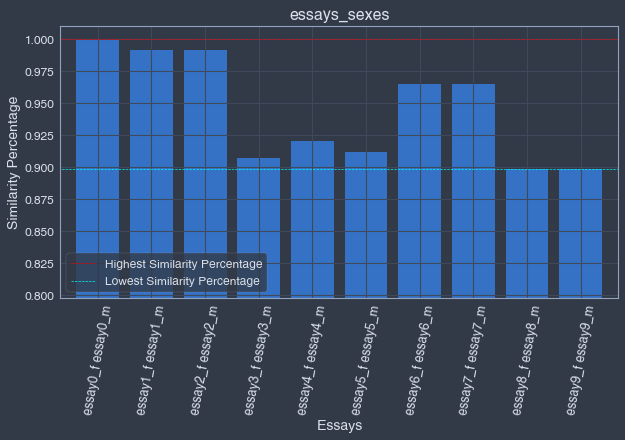

In [17]:
# Displays percentages results graph
sim_sexes.graph()

### + Similarities in the 'age_bracket' category
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_ages`.

In [18]:
# Initializes 
sim_ages = Similarity(essays_ages, 'essays_ages')
# The highest percentages 
sim_ages_highest, sim_ages_highest_terms = sim_ages.highest_sim()
display(sim_ages_highest.style.set_properties(**{'text-align': 'center'}),
        sim_ages_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_ages_lowest, sim_ages_lowest_terms = sim_ages.lowest_sim()
display(sim_ages_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_ages_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_ages.save_results()

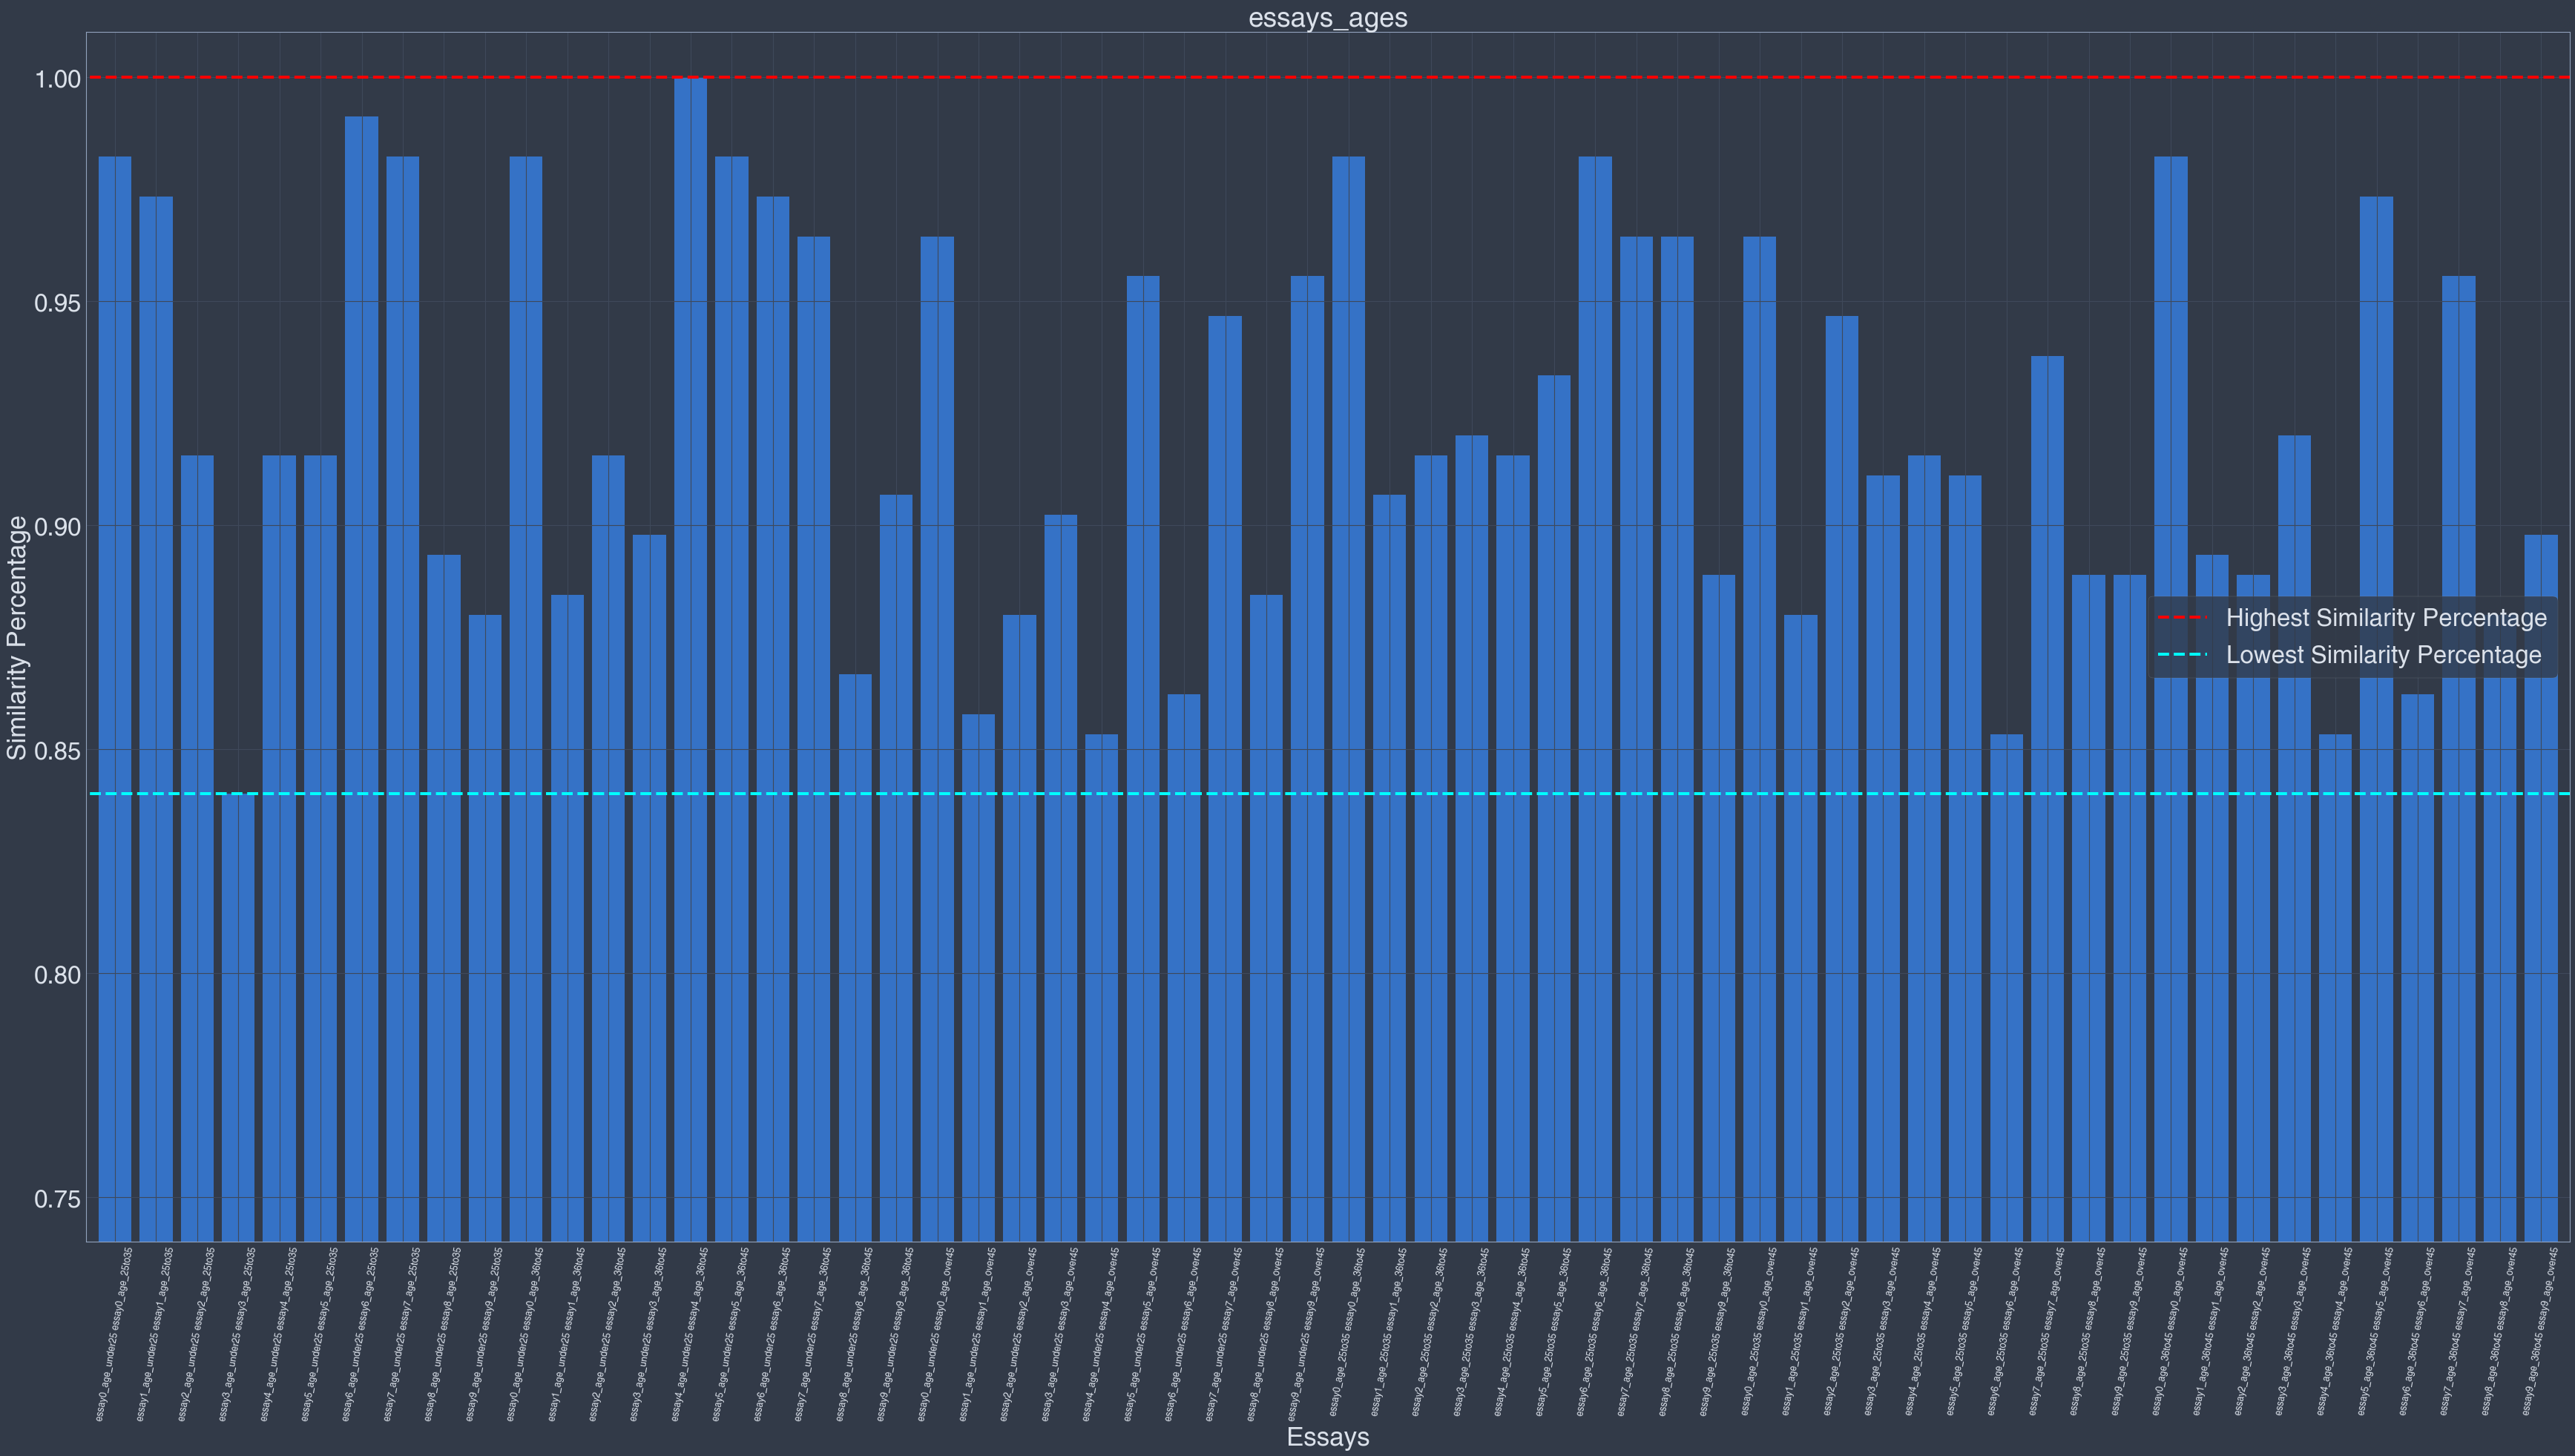

In [19]:
# Displays percentages results graph
sim_ages.graph()

### + Similarities in the combined 'sex' and 'age' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_sexes_ages`.

In [20]:
# Initializes 
sim_sexes_ages = Similarity(essays_sexes_ages, 'essays_sexes_ages')
# The highest percentages 
sim_sexes_ages_highest, sim_sexes_ages_highest_terms = sim_sexes_ages.highest_sim()
display(sim_sexes_ages_highest.style.set_properties(**{'text-align': 'center'}),
        sim_sexes_ages_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_sexes_ages_lowest, sim_sexes_ages_lowest_terms = sim_sexes_ages.lowest_sim()
display(sim_sexes_ages_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_sexes_ages_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_sexes_ages.save_results()

In [21]:
# Displays percentages results graph
sim_sexes_ages.graph()

### + Similarities in the 'orientation' category
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_orientations`.

In [22]:
# Initializes 
sim_orientations = Similarity(essays_orientations, 'essays_orientations')
# The highest percentages 
sim_orientations_highest, sim_orientations_highest_terms = sim_orientations.highest_sim()
display(sim_orientations_highest.style.set_properties(**{'text-align': 'center'}),
        sim_orientations_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_orientations_lowest, sim_orientations_lowest_terms = sim_orientations.lowest_sim()
display(sim_orientations_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_orientations_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_orientations.save_results()

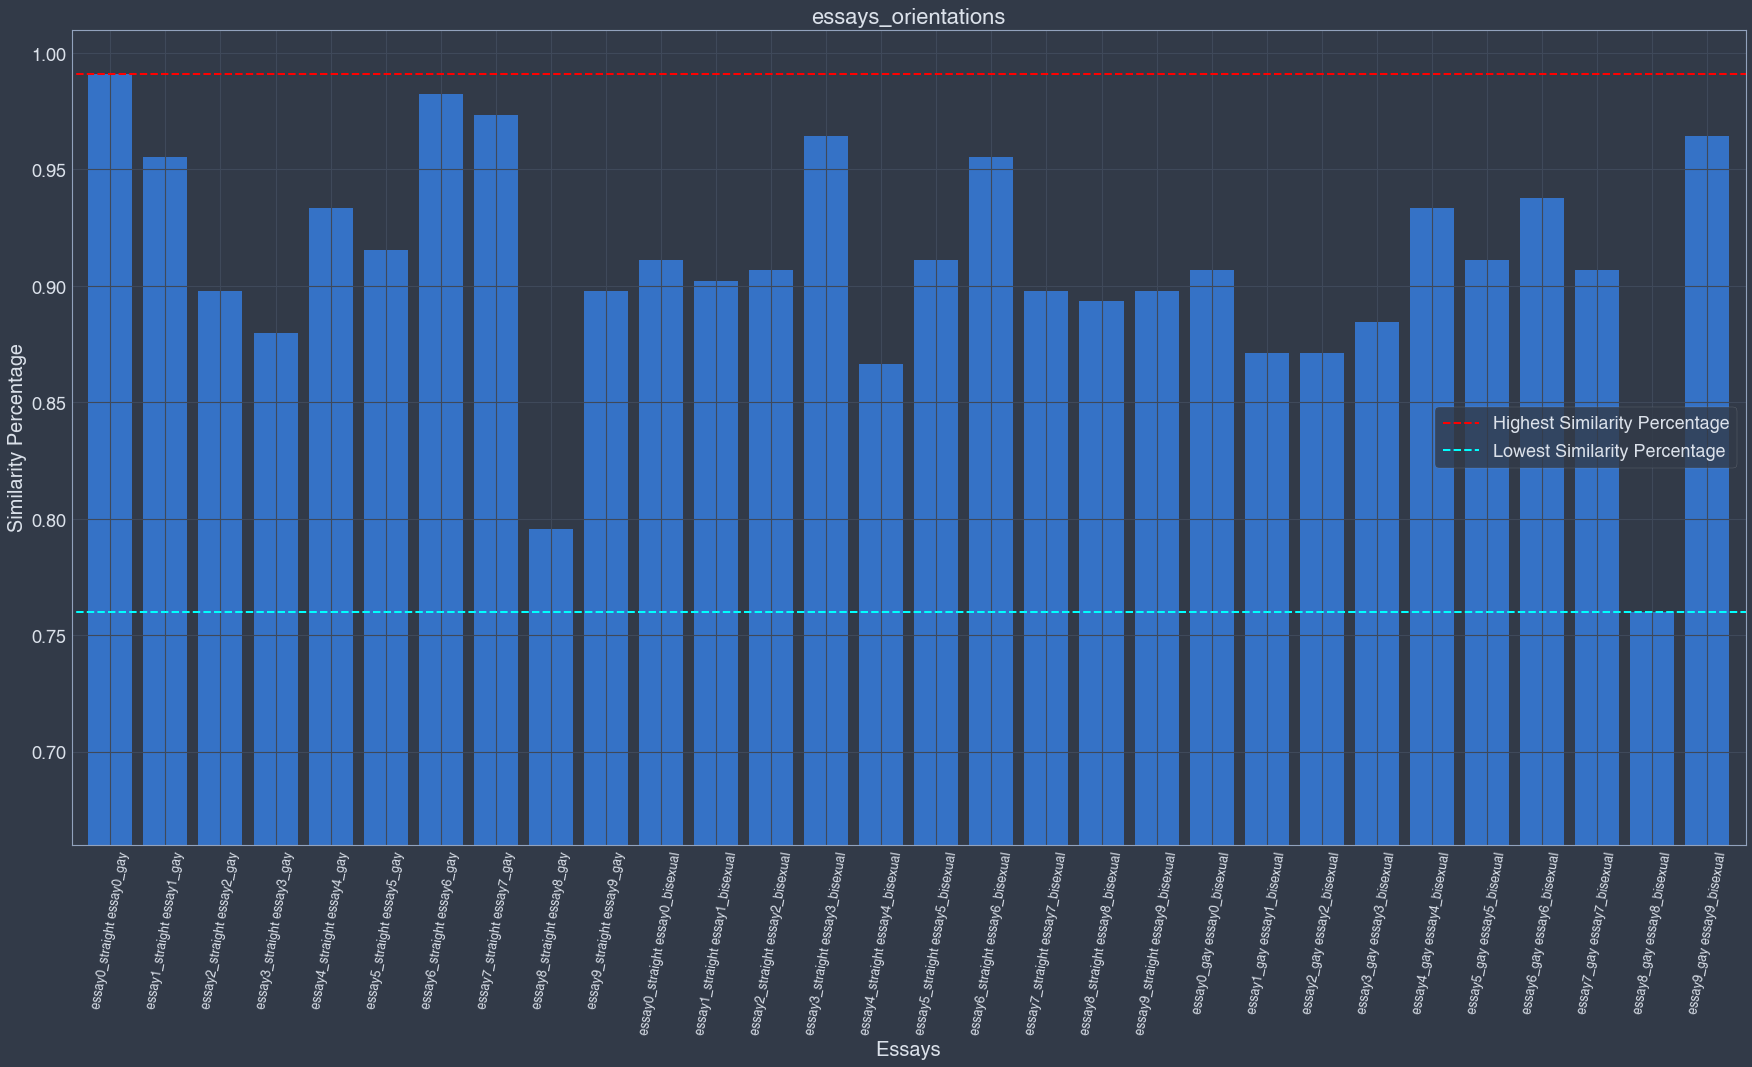

In [23]:
# Displays percentages results graph
sim_orientations.graph()

### + Similarities in the 'sex' and 'orientation' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_sexes_orientations`.

In [24]:
# Initializes 
sim_sexes_orientations = Similarity(essays_sexes_orientations, 'essays_sexes_orientations')
# The highest percentages 
sim_sexes_orientations_highest, sim_sexes_orientations_highest_terms = sim_sexes_orientations.highest_sim()
display(sim_sexes_orientations_highest.style.set_properties(**{'text-align': 'center'}),
        sim_sexes_orientations_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_sexes_orientations_lowest, sim_sexes_orientations_lowest_terms = sim_sexes_orientations.lowest_sim()
display(sim_sexes_orientations_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_sexes_orientations_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_sexes_orientations.save_results()

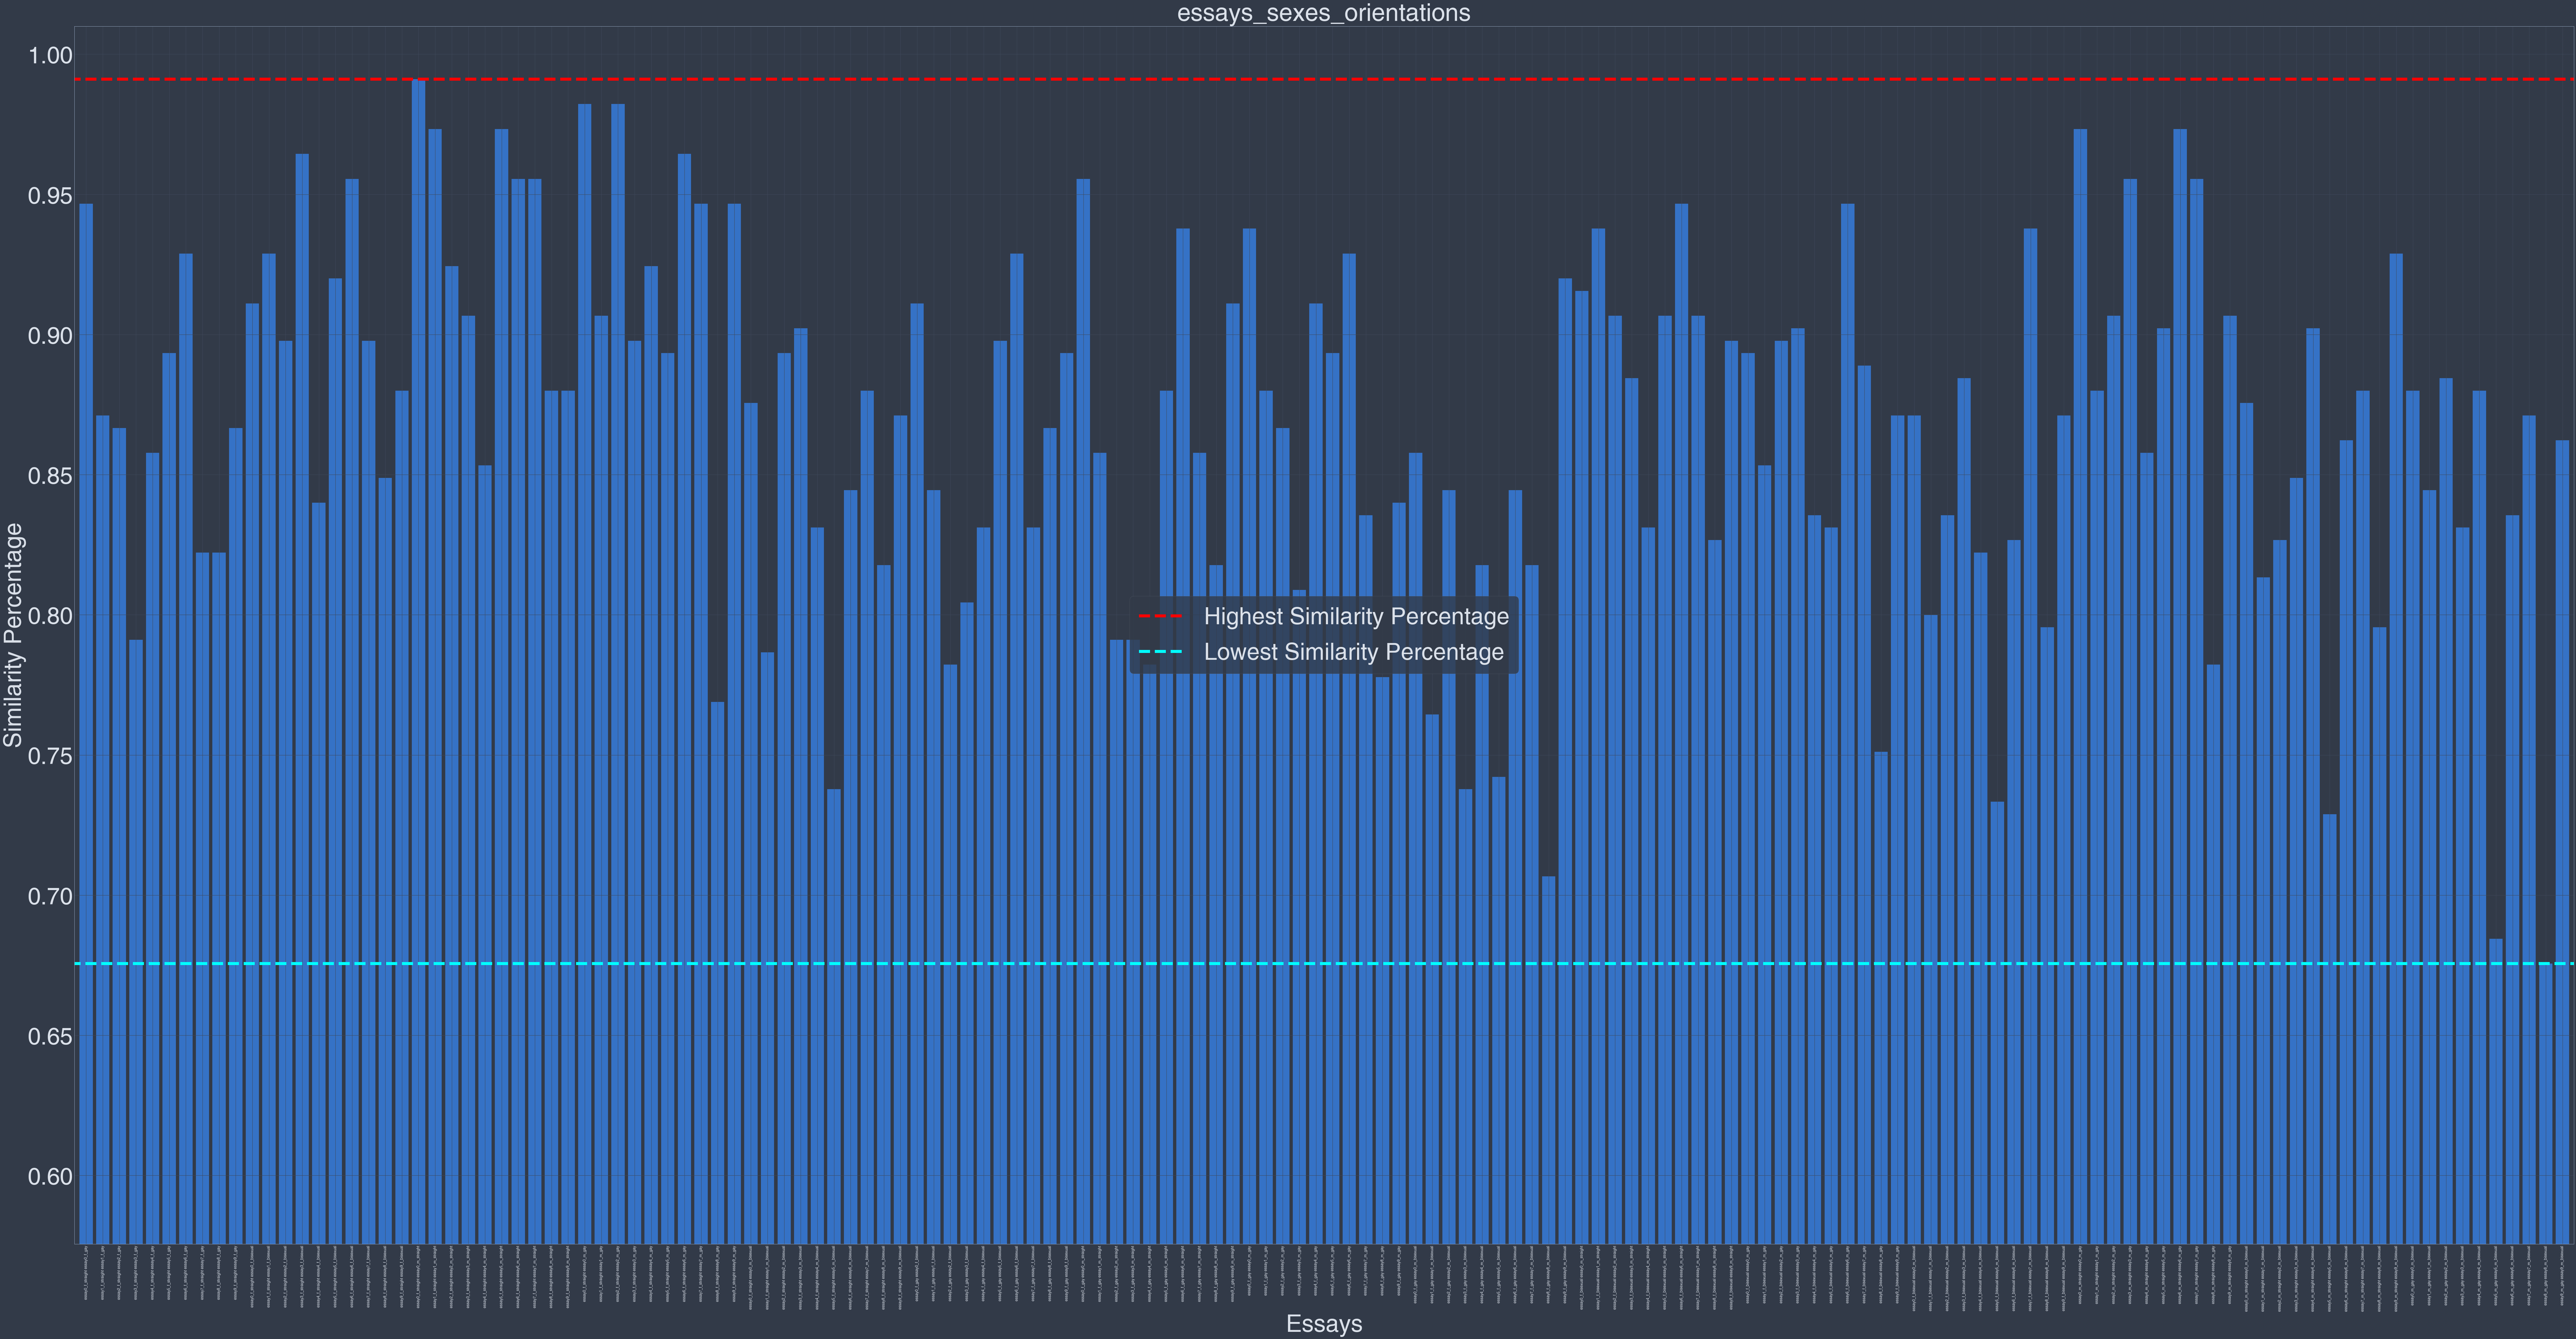

In [25]:
# Displays percentages results graph
sim_sexes_orientations.graph()

### + Similarities in the 'ethnicity_w' category
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_ethnicities`.

In [26]:
# Initializes 
sim_ethnicities = Similarity(essays_ethnicities, 'essays_ethnicities')
# The highest percentages 
sim_ethnicities_highest, sim_ethnicities_highest_terms = sim_ethnicities.highest_sim()
display(sim_ethnicities_highest.style.set_properties(**{'text-align': 'center'}),
        sim_ethnicities_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_ethnicities_lowest, sim_ethnicities_lowest_terms = sim_ethnicities.lowest_sim()
display(sim_ethnicities_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_ethnicities_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_ethnicities.save_results()

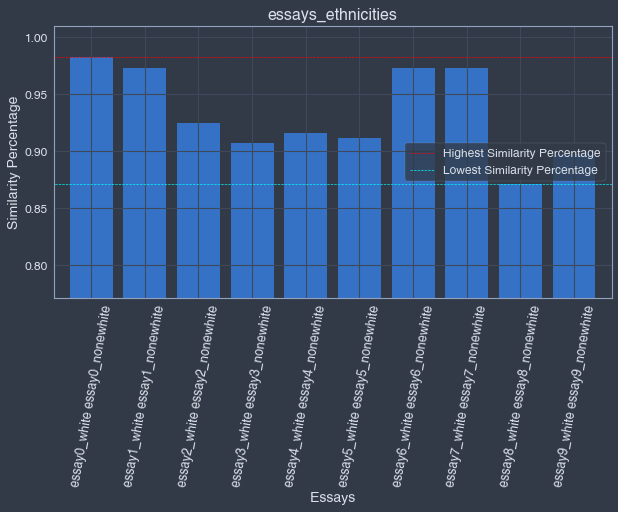

In [27]:
# Displays percentages results graph
sim_ethnicities.graph()

### + Similarities in the 'pets' category
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_pets`.

In [28]:
# Initializes 
sim_pets = Similarity(essays_pets, 'essays_pets')
# The highest percentages 
sim_pets_highest, sim_pets_highest_terms = sim_pets.highest_sim()
display(sim_pets_highest.style.set_properties(**{'text-align': 'center'}),
        sim_pets_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_pets_lowest, sim_pets_lowest_terms = sim_pets.lowest_sim()
display(sim_pets_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_pets_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_pets.save_results()

In [29]:
# Displays percentages results graph
sim_pets.graph()

### + Similarities in the 'sex' and 'pets' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_sexes_pets`.

In [30]:
# Initializes 
sim_sexes_pets = Similarity(essays_sexes_pets, 'essays_sexes_pets')
# The highest percentages 
sim_sexes_pets_highest, sim_sexes_pets_highest_terms = sim_sexes_pets.highest_sim()
display(sim_sexes_pets_highest.style.set_properties(**{'text-align': 'center'}), 
        sim_sexes_pets_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_sexes_pets_lowest, sim_sexes_pets_lowest_terms = sim_sexes_pets.lowest_sim()
display(sim_sexes_pets_lowest.style.set_properties(**{'text-align': 'center'}), 
        sim_sexes_pets_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_sexes_pets.save_results()

## + The Similarity_all class:

Similar to the class `Tfidf`, the class computes the similarity percentage between the TF-IDF all categories essays terms lists and another `Tfidf` class instance TF-IDF essays terms lists. 

In other words, the class computes the similarity percentage between two essay TF-IDF terms lists based on the lists' essay features (ex:`essay0`), the category `all` vs another category (ex:`age_bracker`), the category's subcategories (ex:`under25` and `25to35`), and the lists' term indexes.

<br>

For the similarity percentage formula, see `Tfidf` section.

<br>

Class initialization:
- Takes the attribute:
    - tfidf_instance, Tfidf instance class object
    - tfidf_instance_name, string data type

- Additional attributes:
    - df_essays_all, DataFrame of all combines categories TF-IDf terms results
    - tfidf_terms, list of TF-IDF terms DataFrames, defaulted to tfidf_instance.tfidf_terms
    - n, integer data type, number of terms to compare, defaulted to tfidf_instance.n
    - sim_results, pandas DataFrame data type, similarity percentage results
    - tfidf_instance_name, string data type, name of the tfidf instance
    - col_essays_all, list data type, df_essays_all column names

Class methods:
- display_results()
- display_highest_sim()
- display_lowest_sim(self)
- save_results()
- save_display_highest_sim()
- save_display_lowest_sim()
- graph()

Private methods:
- \__similarity_compute()


In [31]:
class Similarity_all:
    global essays_all
    # -------------------------------------------------------------------------------------------------------------------------------- Special methods
    # ----------------------------------------------------------------------------------- Initialization
    def __init__(self, tfidf_instance, tfidf_instance_name):
        '''
        Takes the arguments:
            - tfidf_instance, Tfidf instance class object
        Calls the method similarity_compute
        '''
        self.tfidf_instance = tfidf_instance
        self.tfidf_instance_name = tfidf_instance_name
        self.df_essays_all = essays_all.tfidf_terms[0]    
        self.tfidf_terms = tfidf_instance.tfidf_terms
        self.n = tfidf_instance.n
        # All essays DataFrame column names
        self.col_essays_all = self.df_essays_all.columns.to_list()
        self.sim_results = self.__similarity_compute()
    # ----------------------------------------------------------------------------------- Representation
    def __repr__(self):
        return f'Similarity({self.tfidf_instance_name}, "{self.tfidf_instance_name}")'
    # ----------------------------------------------------------------------------------- Class instance description
    def __str__(self):
        return f'The similarity percentages of the {self.tfidf_instance_name} categories.'
    # -------------------------------------------------------------------------------------------------------------------------------- Private methods
    # ----------------------------------------------------------------------------------- Similarity percentage computing
    def __similarity_compute(self):
        '''
        Computes the similarity percentage between two essay terms lists of a Tfidf class instance.
            - Computes the index weight of each terms relative to both lists
            - Computes the similarity percentage based on the weights sum
        Returns:
            - a DataFrame of the combined lists names and their similarity percentages
        '''
        similarity_percentage = pd.DataFrame()
        # Loops trough the list combined DataFrames names
        for df in self.tfidf_terms:
            # Loops trough the list of DataFrames columns names
            for col in df.columns:
                sum_terms_weight=0
                # Loops trough the terms in each essay column of the first DataFrame
                for term in df[col]:
                    # Finds if term is the second DataFrame
                    col_all = self.col_essays_all[df.columns.to_list().index(col)]
                    if term in self.df_essays_all[col_all].values:
                        # Adds to counter, the index weight sum between the terms in the first and second DataFrames
                        sum_terms_weight += self.n - abs(df[col].to_list().index(term) - self.df_essays_all[col_all].to_list().index(term))
                # Computes the categories Similarity Percentage by essay feature
                perc = sum_terms_weight/self.n**2
                # Saves Results in a DataFrame 
                similarity_percentage[f'{col_all} vs {col}'] = [perc]
        # Creates a Dataframe with the columns Categories and Similarity Percentage
        similarty_results = similarity_percentage.T.reset_index().rename(columns={'index': 'Categories', 0:'Similarity Percentage'})
        return similarty_results
    # -------------------------------------------------------------------------------------------------------------------------------- Class methods
    # ----------------------------------------------------------------------------------- Displaying similarity percentages results 
    def display_results(self):
        '''
        Displays all the categories similarity percentages results 
        '''
        display(self.sim_results.style.set_properties(**{'text-align': 'center'}))
    # ----------------------------------------------------------------------------------- Highest similarity percentage  
    def highest_sim(self):
        '''
        Returns the highest similarity percentage results 
        and the corresponding lists of terms 
        '''
        # ------- Finds the highest similarity percentage
        sim_max = self.sim_results.loc[self.sim_results['Similarity Percentage'] == self.sim_results['Similarity Percentage'].max()] \
                                  .rename(columns={'Similarity Percentage':'Highest Similarity Percentage'})
        # ------ Finds the corresponding list of terms
        cat_names_list = [combination.split(' vs ') for combination in sim_max['Categories']]
        # Saves results in a DataFrame
        df_max = pd.DataFrame()
        # Loops through the combined essay category names
        for cat_names in cat_names_list:
           # Loops through the essay category names
            for name in cat_names:
                # Finds the terms list
                for df in self.tfidf_terms:
                    if name in df.columns:
                        col_all = self.col_essays_all[df.columns.to_list().index(name)]
                        df_max[col_all] = self.df_essays_all[col_all]
                        df_max[name] = df[name]
        return sim_max, df_max
    # ----------------------------------------------------------------------------------- Displaying the lowest similarity percentage  
    def lowest_sim(self):
        '''
        Displays the lowest similarity percentage results 
        and the corresponding lists of terms 
        '''
        sim_min = self.sim_results.loc[self.sim_results['Similarity Percentage'] == self.sim_results['Similarity Percentage'].min()] \
                                  .rename(columns={'Similarity Percentage':'Lowest Similarity Percentage'})
        # ------- Finds the lowest similarity percentage
        cat_names_list = [combination.split(' vs ') for combination in sim_min['Categories']]
        # ------ Finds the corresponding list of terms
        df_min = pd.DataFrame()
        # Saves results in a DataFrame
        for cat_names in cat_names_list:
            # Loops through the essay category names
            for name in cat_names:
                # Finds the terms list
                for df in self.tfidf_terms:
                    if name in df.columns:
                        col_all = self.col_essays_all[df.columns.to_list().index(name)]
                        df_min[col_all] = self.df_essays_all[col_all]
                        df_min[name] = df[name]
                        
        return sim_min, df_min  
    # ----------------------------------------------------------------------------------- Saving similarity percentages results
    def save_results(self):
        '''
        Saves the reslts DataFrame
        '''
        self.sim_results.to_csv(f'data/sim_percentages/essays_all_vs_{self.tfidf_instance_name}_similarity_perc.csv')
    # ----------------------------------------------------------------------------------- Graph
    def graph(self):
        '''
        Displays a bar plot of the results,
        and saves the plot as a png image
        '''
        cat_name = [name[14:] for name in self.sim_results['Categories']]
        len_cat_name = len(cat_name)
        len_cat = len(self.sim_results['Categories'])
        # Creates a figure
        plt.figure(figsize=(len_cat_name, len_cat_name/2))
        # Creates the Bar plot
        plt.bar(cat_name, self.sim_results['Similarity Percentage'])
        # Slims the Graph dimensions
        plt.ylim(self.sim_results['Similarity Percentage'].min() - 0.1, 1.01)
        plt.xlim(-0.7,len_cat-0.3)
        # Plots the highest and lowest Similarity Percentages dotted lines
        plt.plot(range(-1, len_cat+1), 
                 [self.sim_results['Similarity Percentage'].max() for i in range(-1, len_cat+1)], 
                 '--',
                linewidth=len_cat_name/15,
                 color="red")
        plt.plot(range(-1, len_cat+1), 
                 [self.sim_results['Similarity Percentage'].min() for i in range(-1, len_cat+1)], 
                 '--', 
                linewidth=len_cat_name/15,
                 color="cyan")
        # x ticks labels orientation
        if len_cat_name > 90:
            degrees = 90
        elif len(cat_name[0]) > 8 and len_cat_name < 65:
            degrees = 75
        else:
            degrees = len_cat_name + 10
        # Font size
        if len_cat_name < 18:
            font_size = 9
        else:
            font_size = len_cat_name/2
        # Ticks labels
        plt.xticks(rotation=degrees)
        plt.yticks(size=font_size+3)
        # Legende and title
        plt.legend(['Highest Similarity Percentage', 'Lowest Similarity Percentage'], prop={'size': font_size+3})
        plt.title(f'{self.tfidf_instance_name}', fontdict = {'fontsize' : font_size+7})
        # y and x labels
        plt.ylabel('Similarity Percentage', size=font_size+5)
        plt.xlabel('Essays', size=font_size+5)
        # Saves and shows
        plt.savefig(f'graph/essays_all_{self.tfidf_instance_name}.png')       
        plt.show()

### + Similarities between the 'all' and 'sex' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_all` and `essays_sexes`.

In [32]:
# Initializes 
sim_all_sexes = Similarity_all(essays_sexes, 'essays_sexes')
# Displays percentages results 
sim_all_sexes.display_results()
# The highest percentages 
sim_all_sexes_highest, sim_all_sexes_highest_terms = sim_all_sexes.highest_sim()
display(sim_all_sexes_highest.style.set_properties(**{'text-align': 'center'}),
        sim_all_sexes_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_all_sexes_lowest, sim_all_sexes_lowest_terms = sim_all_sexes.lowest_sim()
display(sim_all_sexes_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_all_sexes_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_all_sexes.save_results()

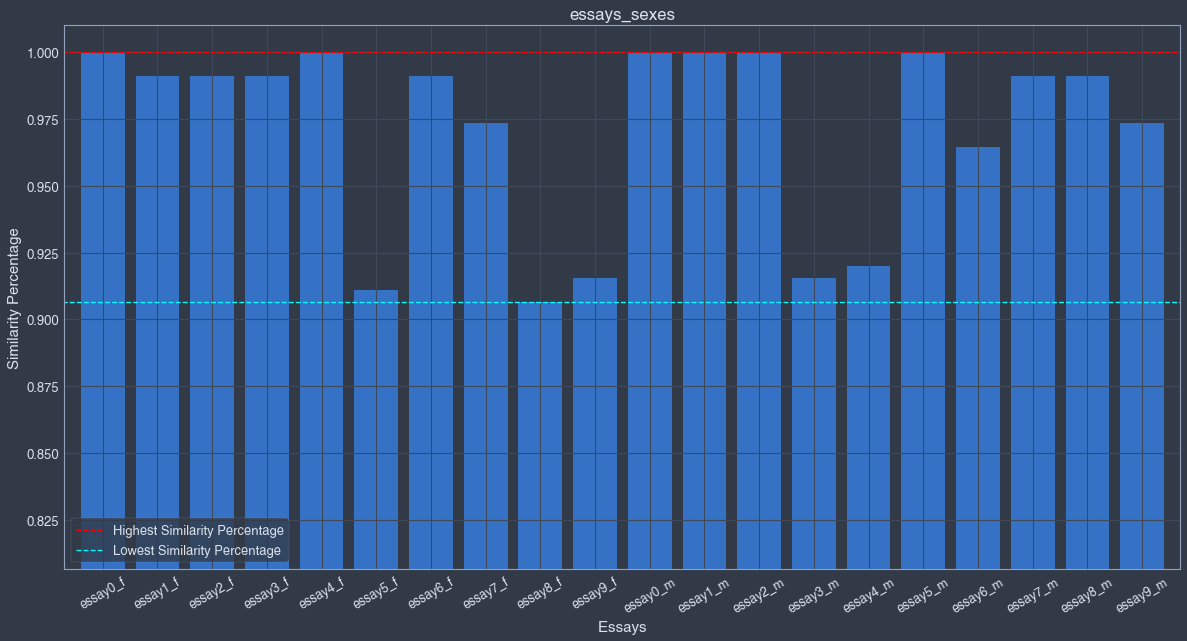

In [33]:
# Displays percentages results graph
sim_all_sexes.graph()

### + Similarities between the 'all' and 'age_bracket' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_all` and `essays_ages`.

In [34]:
# Initializes 
sim_all_ages = Similarity_all(essays_ages, 'essays_ages')
# The highest percentages 
sim_all_ages_highest, sim_all_ages_highest_terms = sim_all_ages.highest_sim()
display(sim_all_ages_highest.style.set_properties(**{'text-align': 'center'}),
        sim_all_ages_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_all_ages_lowest, sim_all_ages_lowest_terms = sim_all_ages.lowest_sim()
display(sim_all_ages_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_all_ages_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_all_ages.save_results()

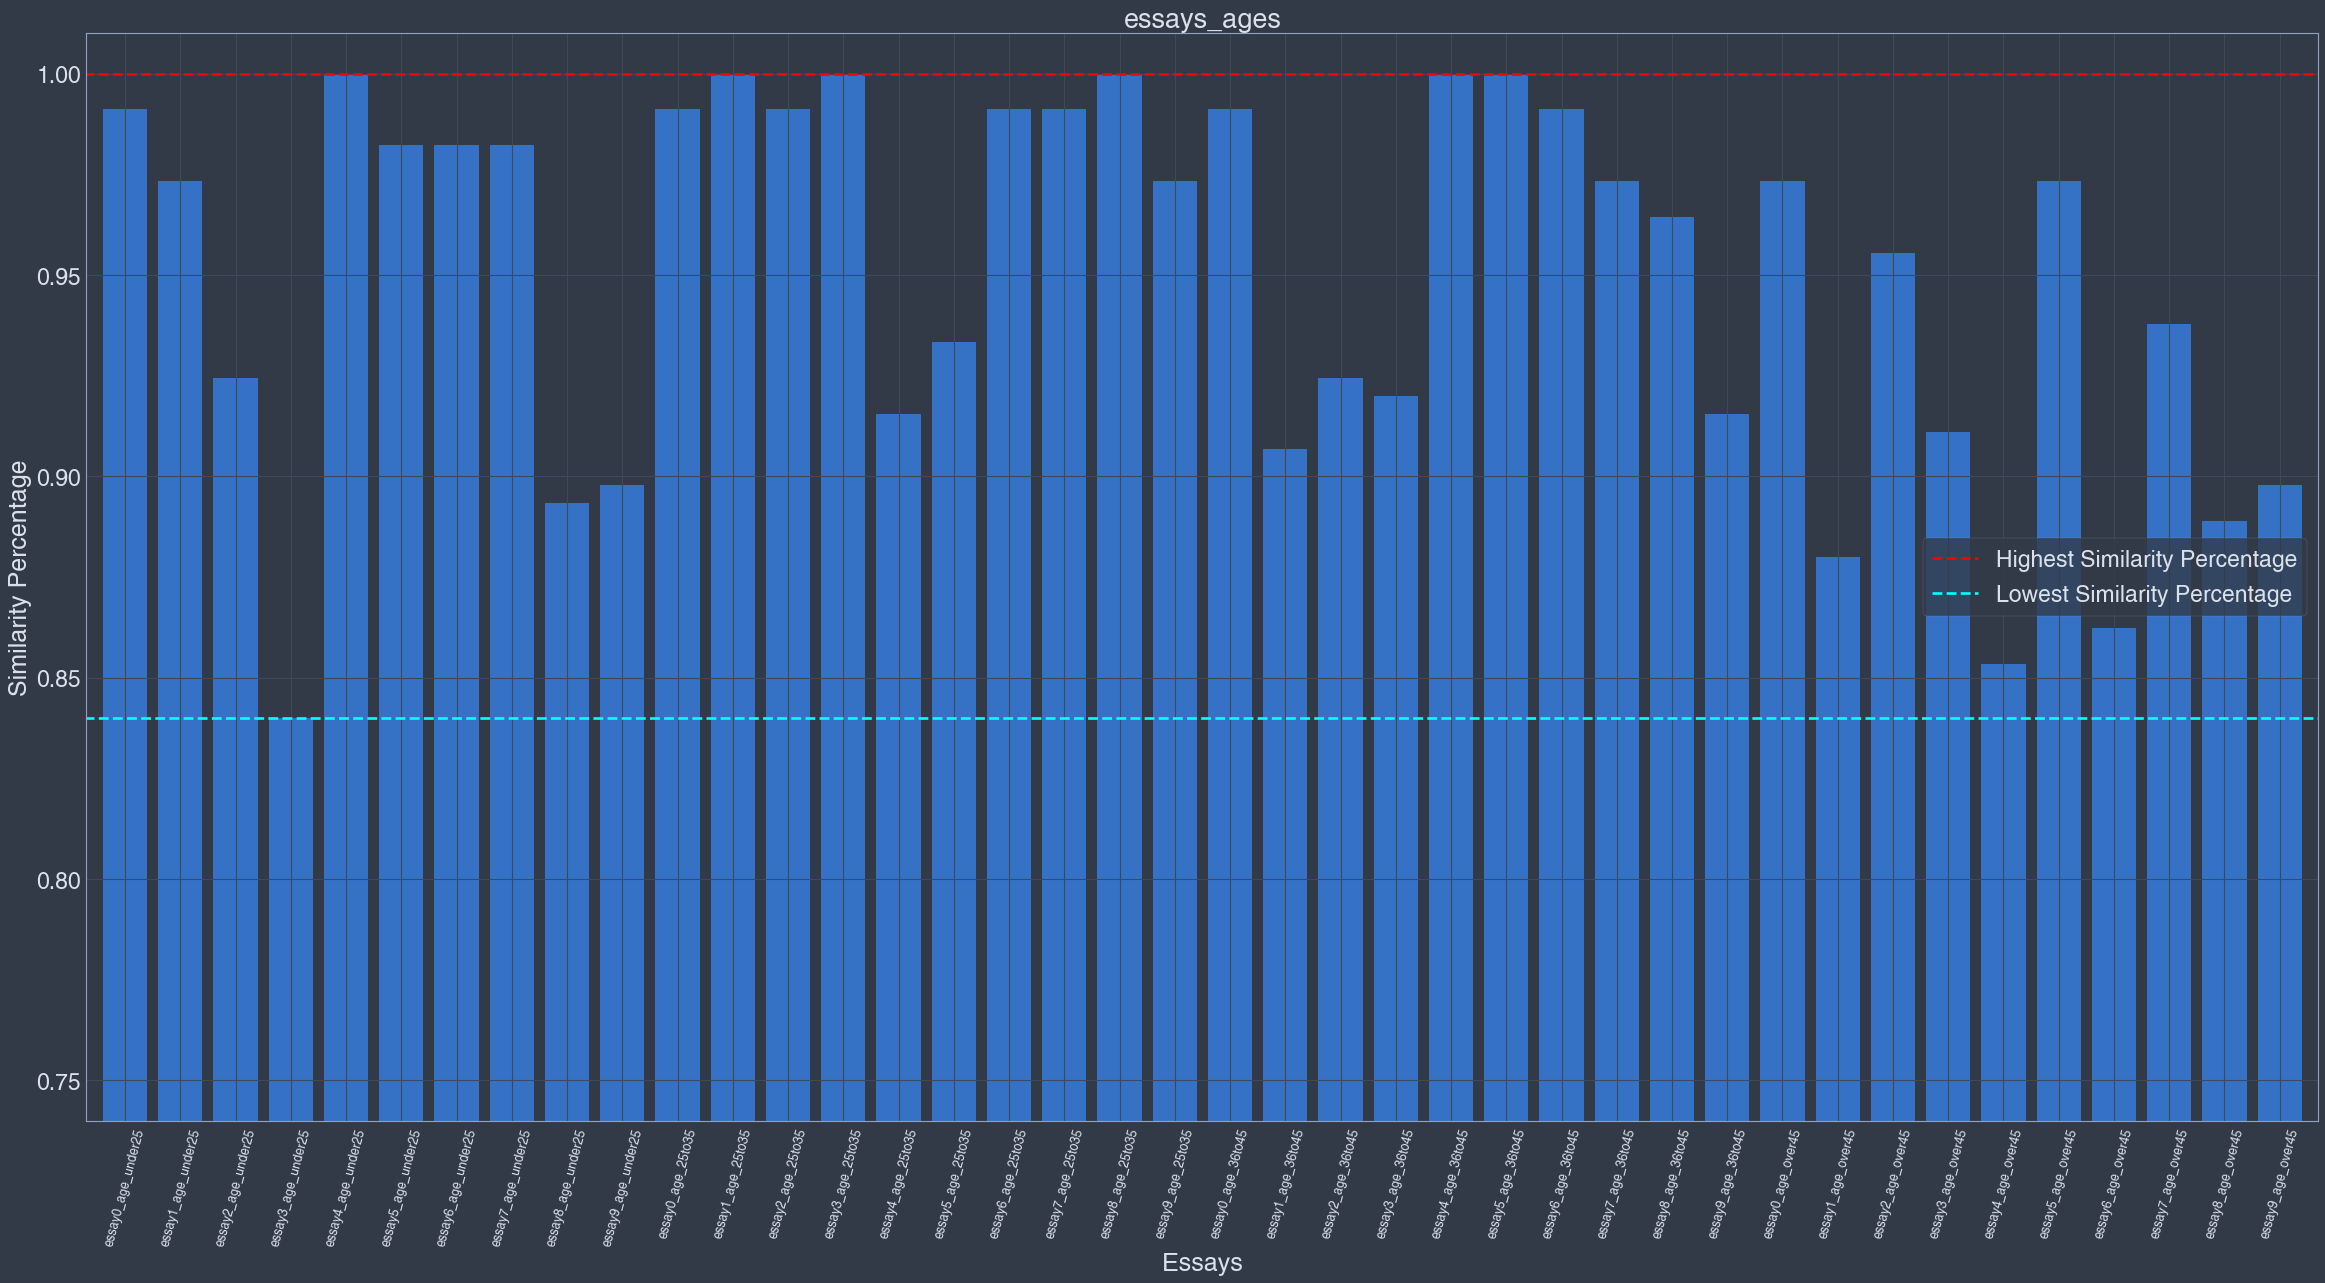

In [35]:
# Displays percentages results graph
sim_all_ages.graph()

### + Similarities between the 'all' and 'sex'-'age_bracket' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_all` and the `essays_sexes_ages`.

In [36]:
# Initializes 
sim_all_sexes_ages = Similarity_all(essays_sexes_ages, 'essays_sexes_ages')
# The highest percentsexes_ages 
sim_all_sexes_ages_highest, sim_all_sexes_ages_highest_terms = sim_all_sexes_ages.highest_sim()
display(sim_all_sexes_ages_highest.style.set_properties(**{'text-align': 'center'}),
        sim_all_sexes_ages_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentsexes_ages
sim_all_sexes_ages_lowest, sim_all_sexes_ages_lowest_terms = sim_all_sexes_ages.lowest_sim()
display(sim_all_sexes_ages_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_all_sexes_ages_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentsexes_ages results
sim_all_sexes_ages.save_results()

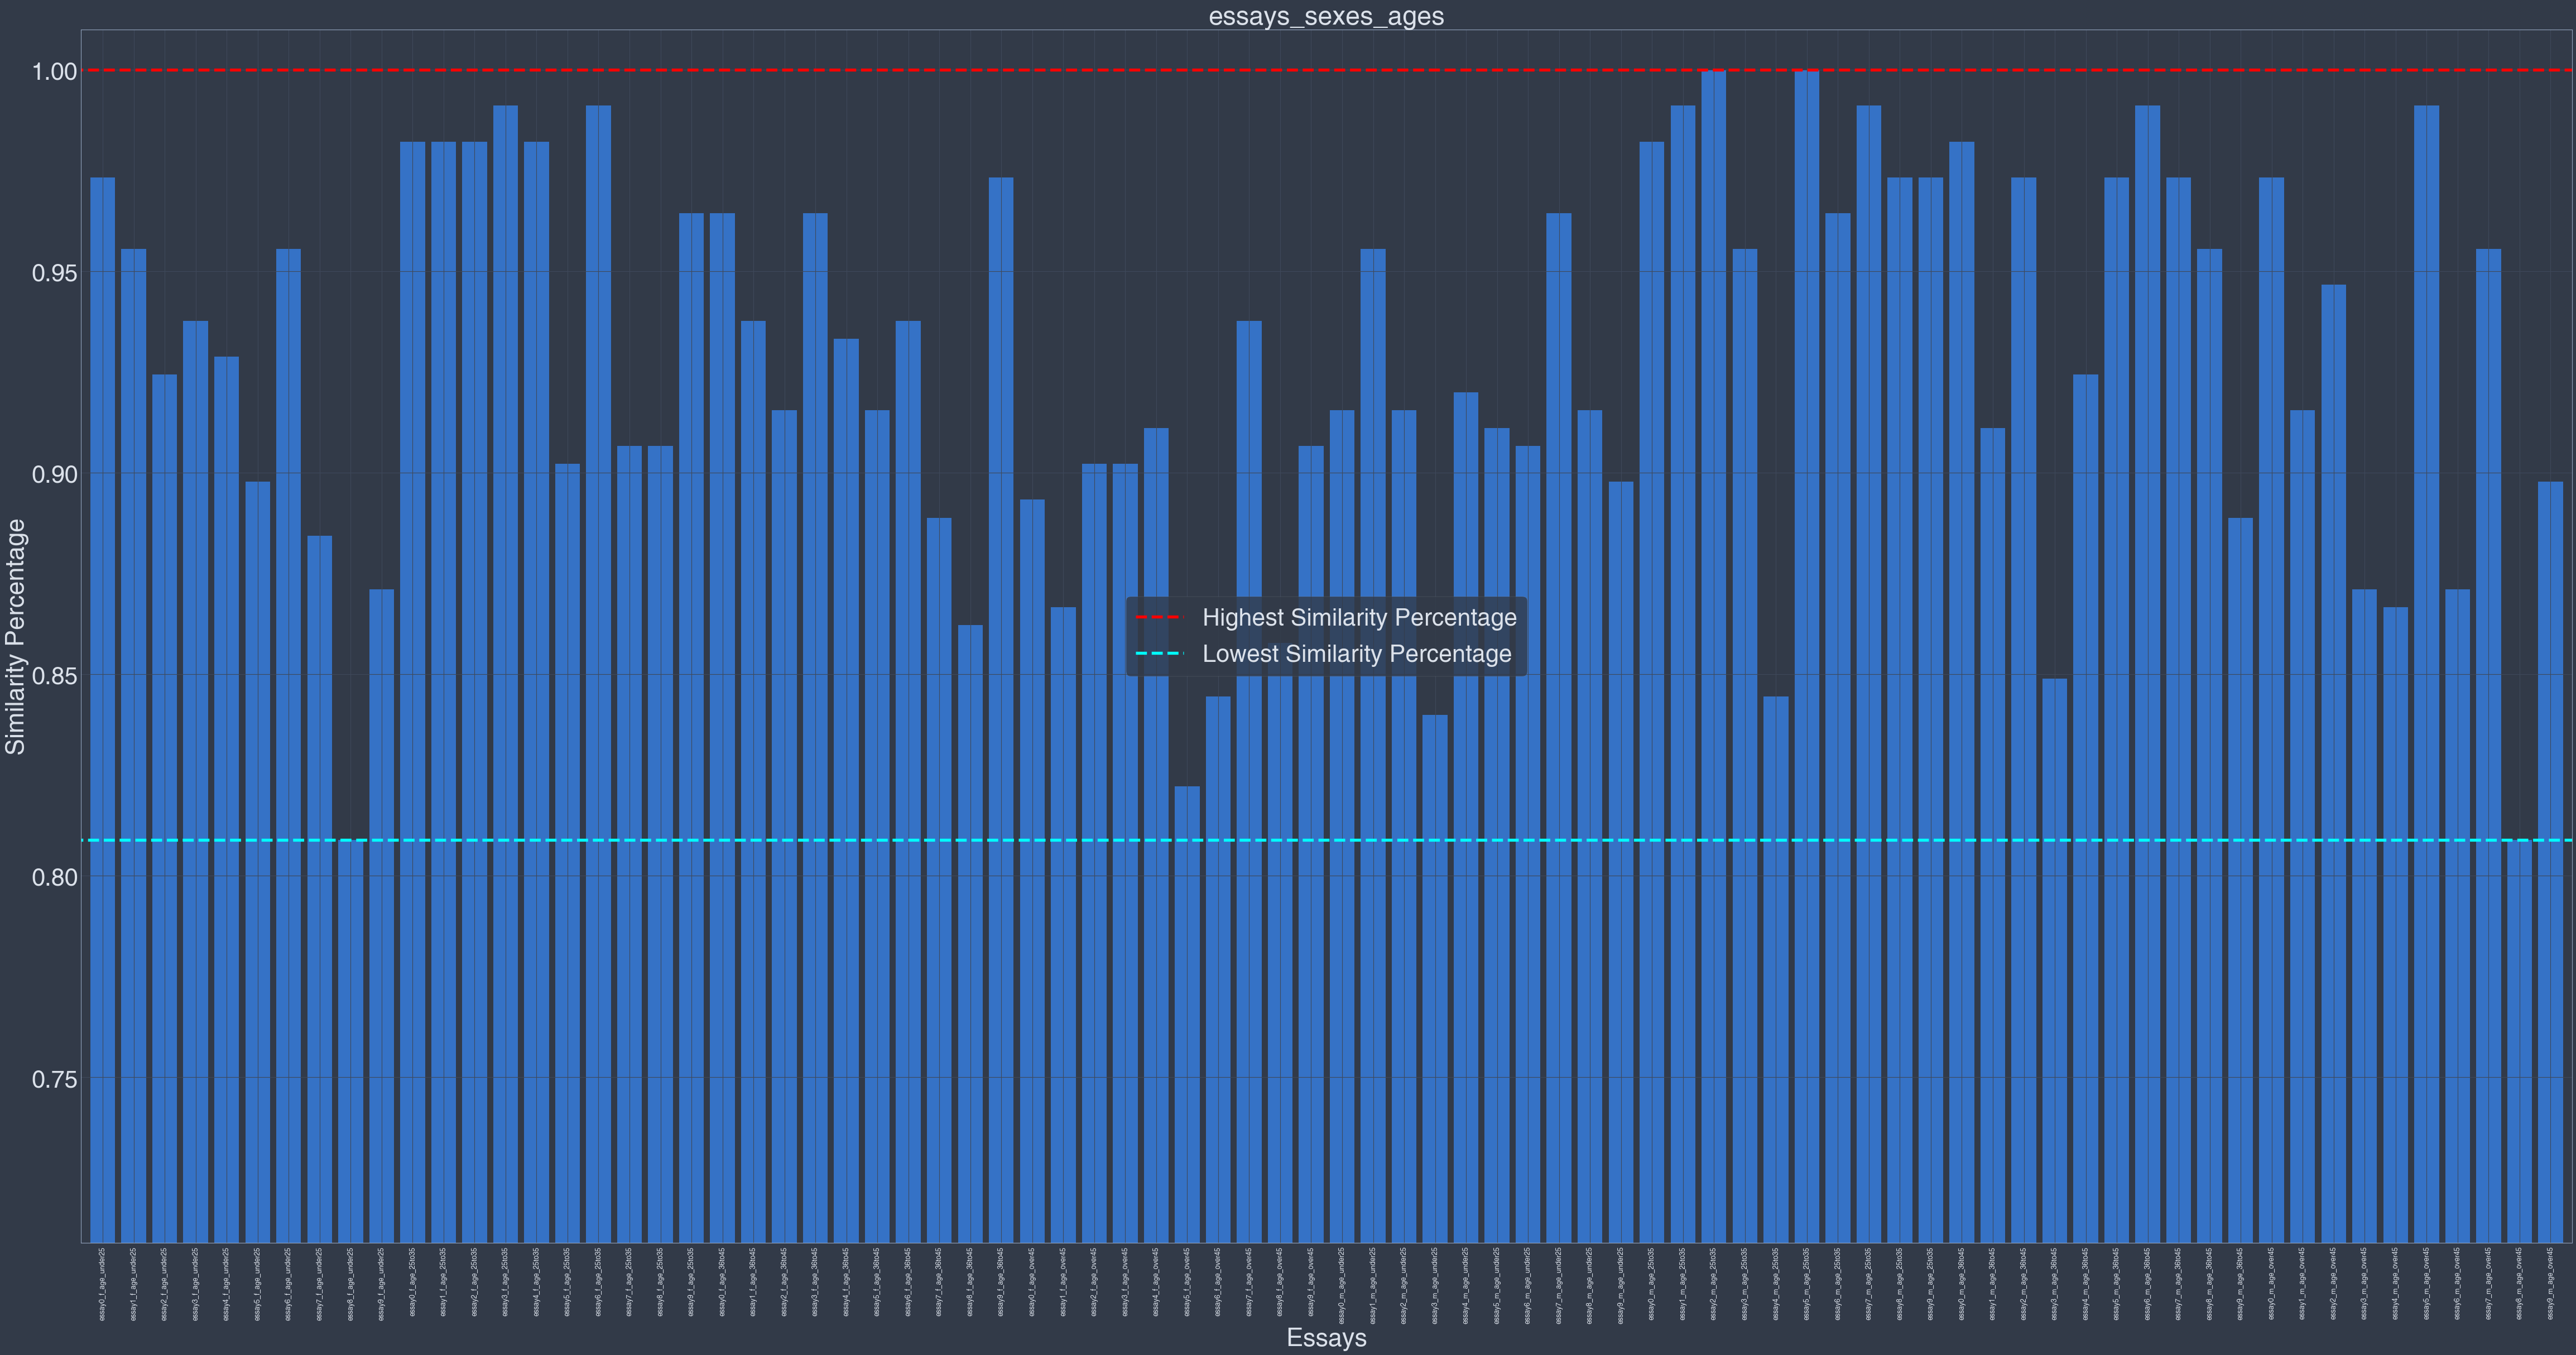

In [37]:
# Displays percentages results graph
sim_all_sexes_ages.graph()

### + Similarities between the 'all' and 'orientation' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_all` and `essays_orientations`.

In [38]:
# Initializes 
sim_all_orientations = Similarity_all(essays_orientations, 'essays_orientations')
# The highest percentages 
sim_all_orientations_highest, sim_all_orientations_highest_terms = sim_all_orientations.highest_sim()
display(sim_all_orientations_highest.style.set_properties(**{'text-align': 'center'}),
        sim_all_orientations_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_all_orientations_lowest, sim_all_orientations_lowest_terms = sim_all_orientations.lowest_sim()
display(sim_all_orientations_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_all_orientations_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_all_orientations.save_results()

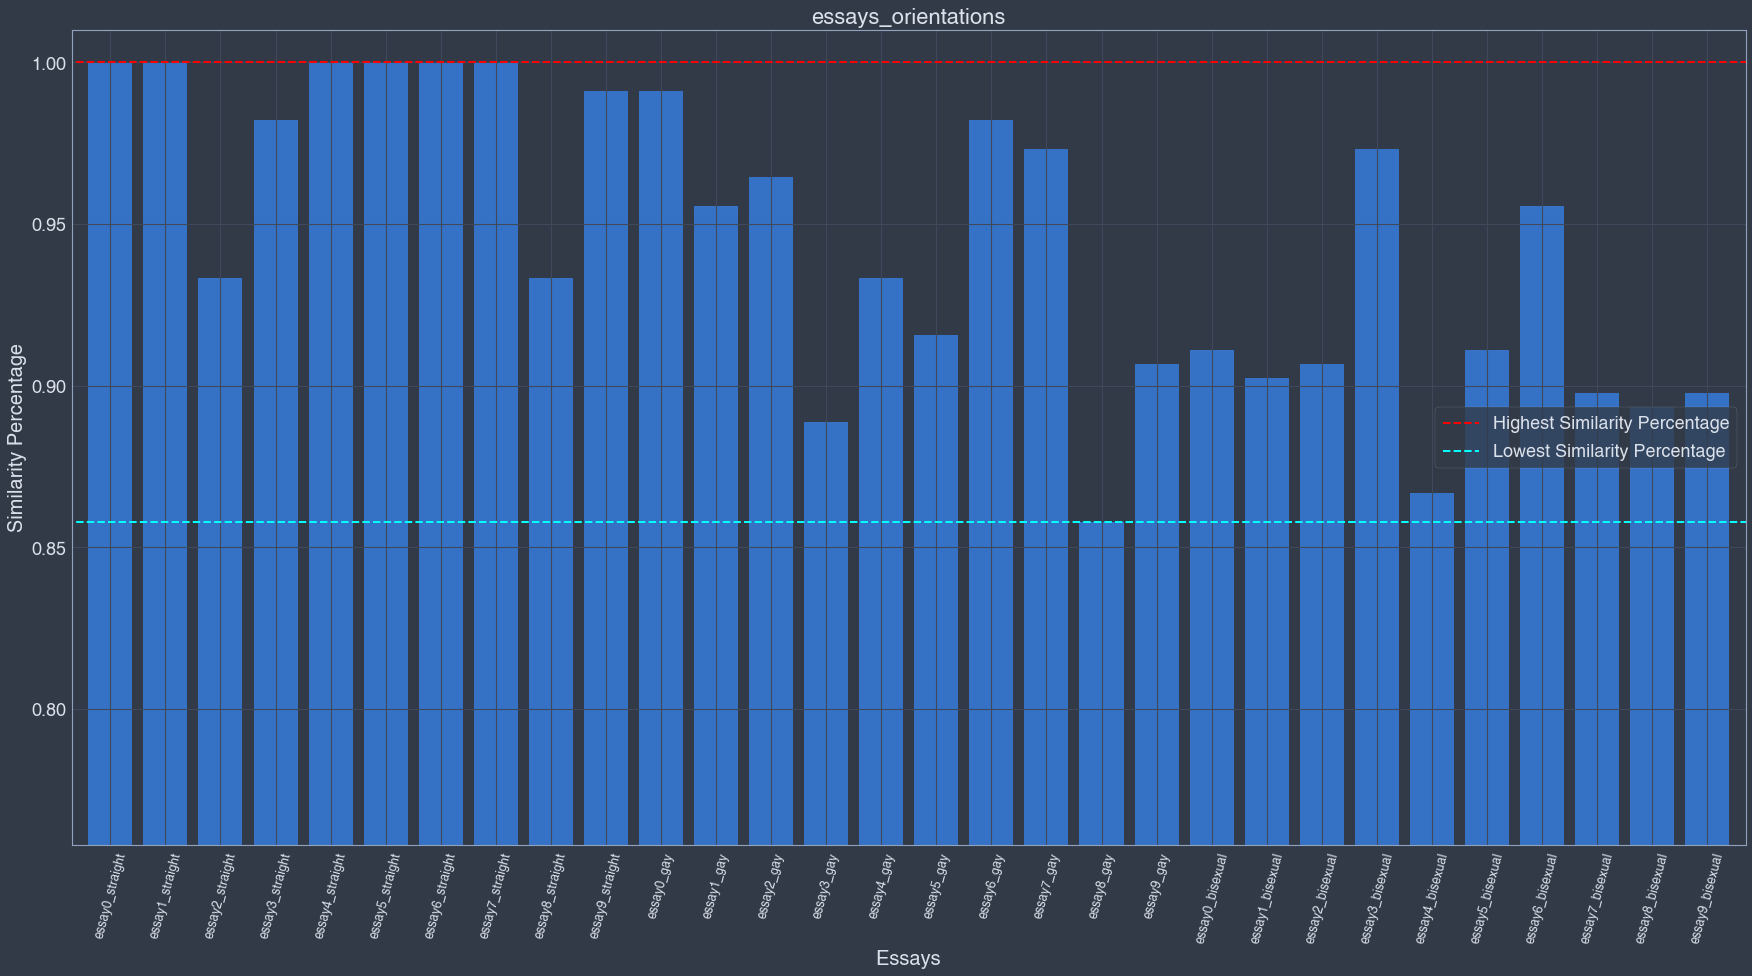

In [39]:
# Displays percentages results graph
sim_all_orientations.graph()

### + Similarities between the 'all' and 'sex'-'orientation' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_all` and the `essays_sexes_orientations`.

In [40]:
# Initializes 
sim_all_sexes_orientations = Similarity_all(essays_sexes_orientations, 'essays_sexes_orientations')
# The highest percentsexes_orientations 
sim_all_sexes_orientations_highest, sim_all_sexes_orientations_highest_terms = sim_all_sexes_orientations.highest_sim()
display(sim_all_sexes_orientations_highest.style.set_properties(**{'text-align': 'center'}),
        sim_all_sexes_orientations_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentsexes_orientations
sim_all_sexes_orientations_lowest, sim_all_sexes_orientations_lowest_terms = sim_all_sexes_orientations.lowest_sim()
display(sim_all_sexes_orientations_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_all_sexes_orientations_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentsexes_orientations results
sim_all_sexes_orientations.save_results()

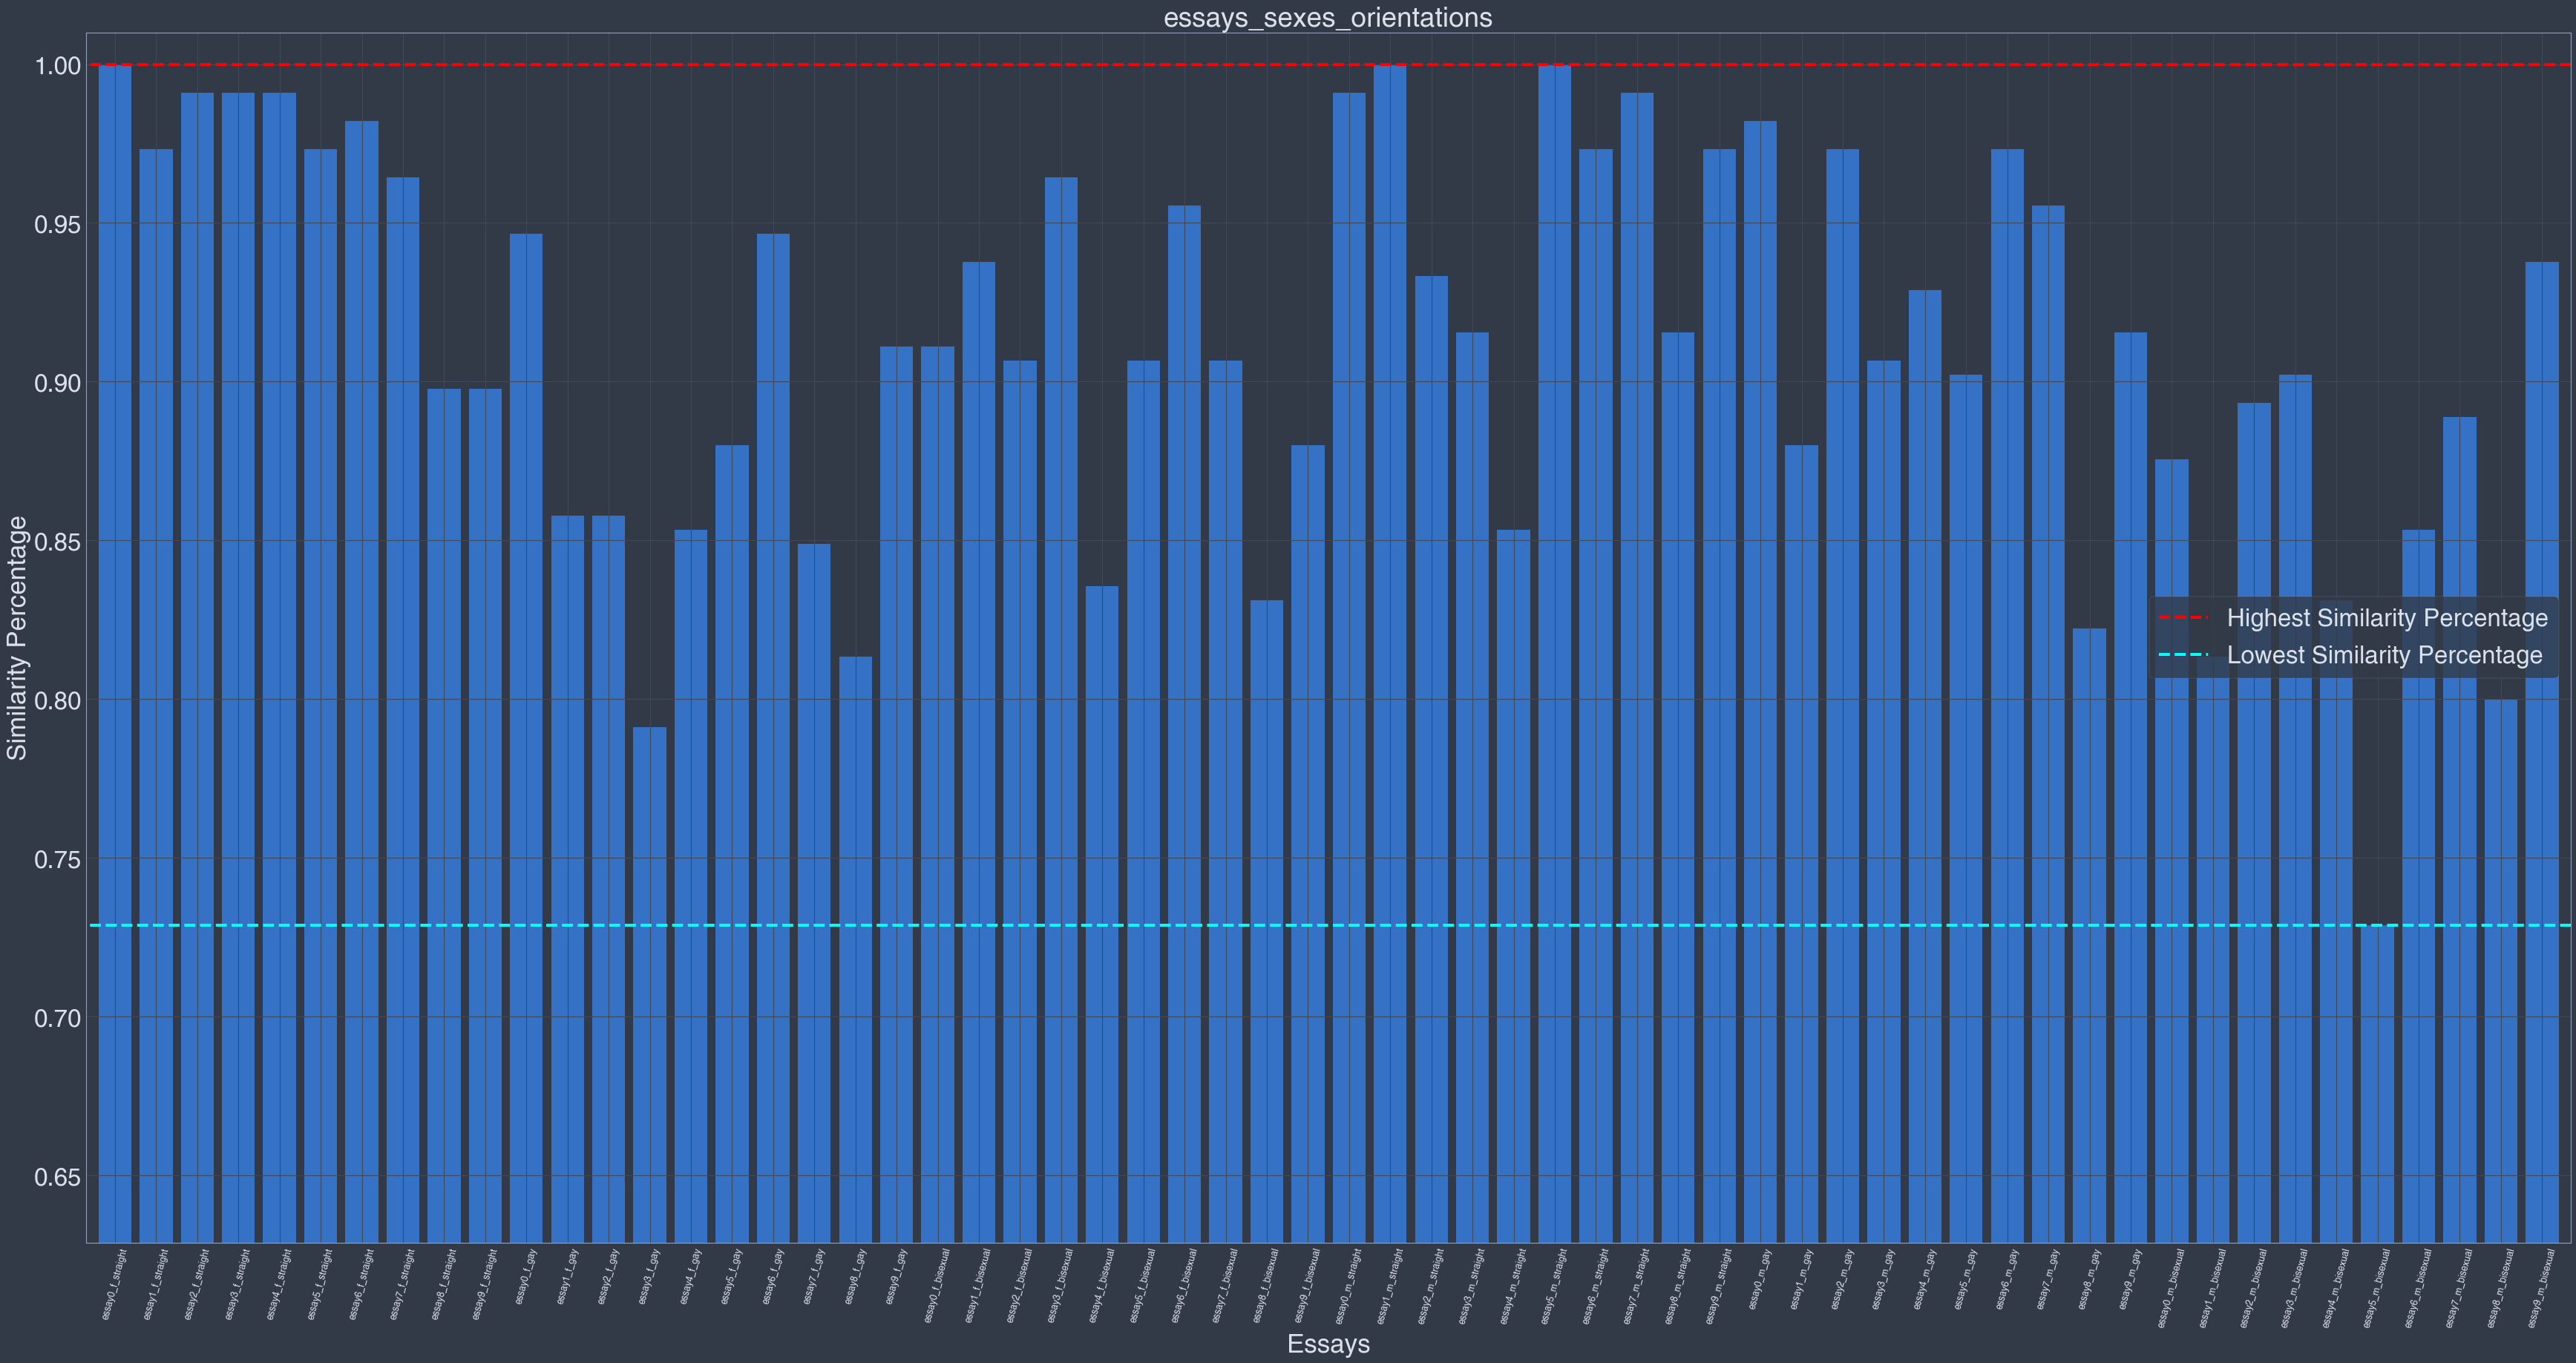

In [41]:
# Displays percentages results graph
sim_all_sexes_orientations.graph()

### + Similarities between the 'all' and 'ethnicity_w' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_all` and `essays_ethnicities`.

In [42]:
# Initializes 
sim_all_ethnicities = Similarity_all(essays_ethnicities, 'essays_ethnicities')
# The highest percentages 
sim_all_ethnicities_highest, sim_all_ethnicities_highest_terms = sim_all_ethnicities.highest_sim()
display(sim_all_ethnicities_highest.style.set_properties(**{'text-align': 'center'}),
        sim_all_ethnicities_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_all_ethnicities_lowest, sim_all_ethnicities_lowest_terms = sim_all_ethnicities.lowest_sim()
display(sim_all_ethnicities_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_all_ethnicities_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_all_ethnicities.save_results()

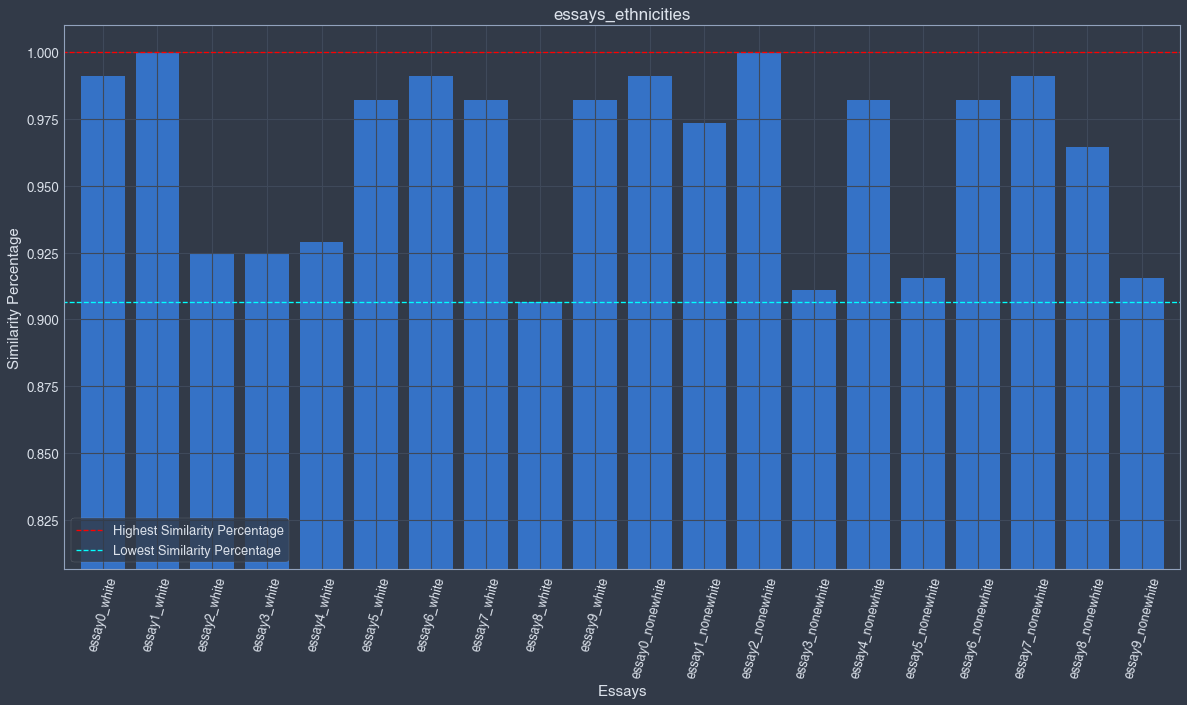

In [43]:
# Displays percentages results graph
sim_all_ethnicities.graph()

### + Similarities between the 'all' and 'pets' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_all` and `pets`.

In [44]:
# Initializes 
sim_all_pets = Similarity_all(essays_pets, 'essays_pets')
# The highest percentages 
sim_all_pets_highest, sim_all_pets_highest_terms = sim_all_pets.highest_sim()
display(sim_all_pets_highest.style.set_properties(**{'text-align': 'center'}),
        sim_all_pets_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentages
sim_all_pets_lowest, sim_all_pets_lowest_terms = sim_all_pets.lowest_sim()
display(sim_all_pets_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_all_pets_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentages results
sim_all_pets.save_results()

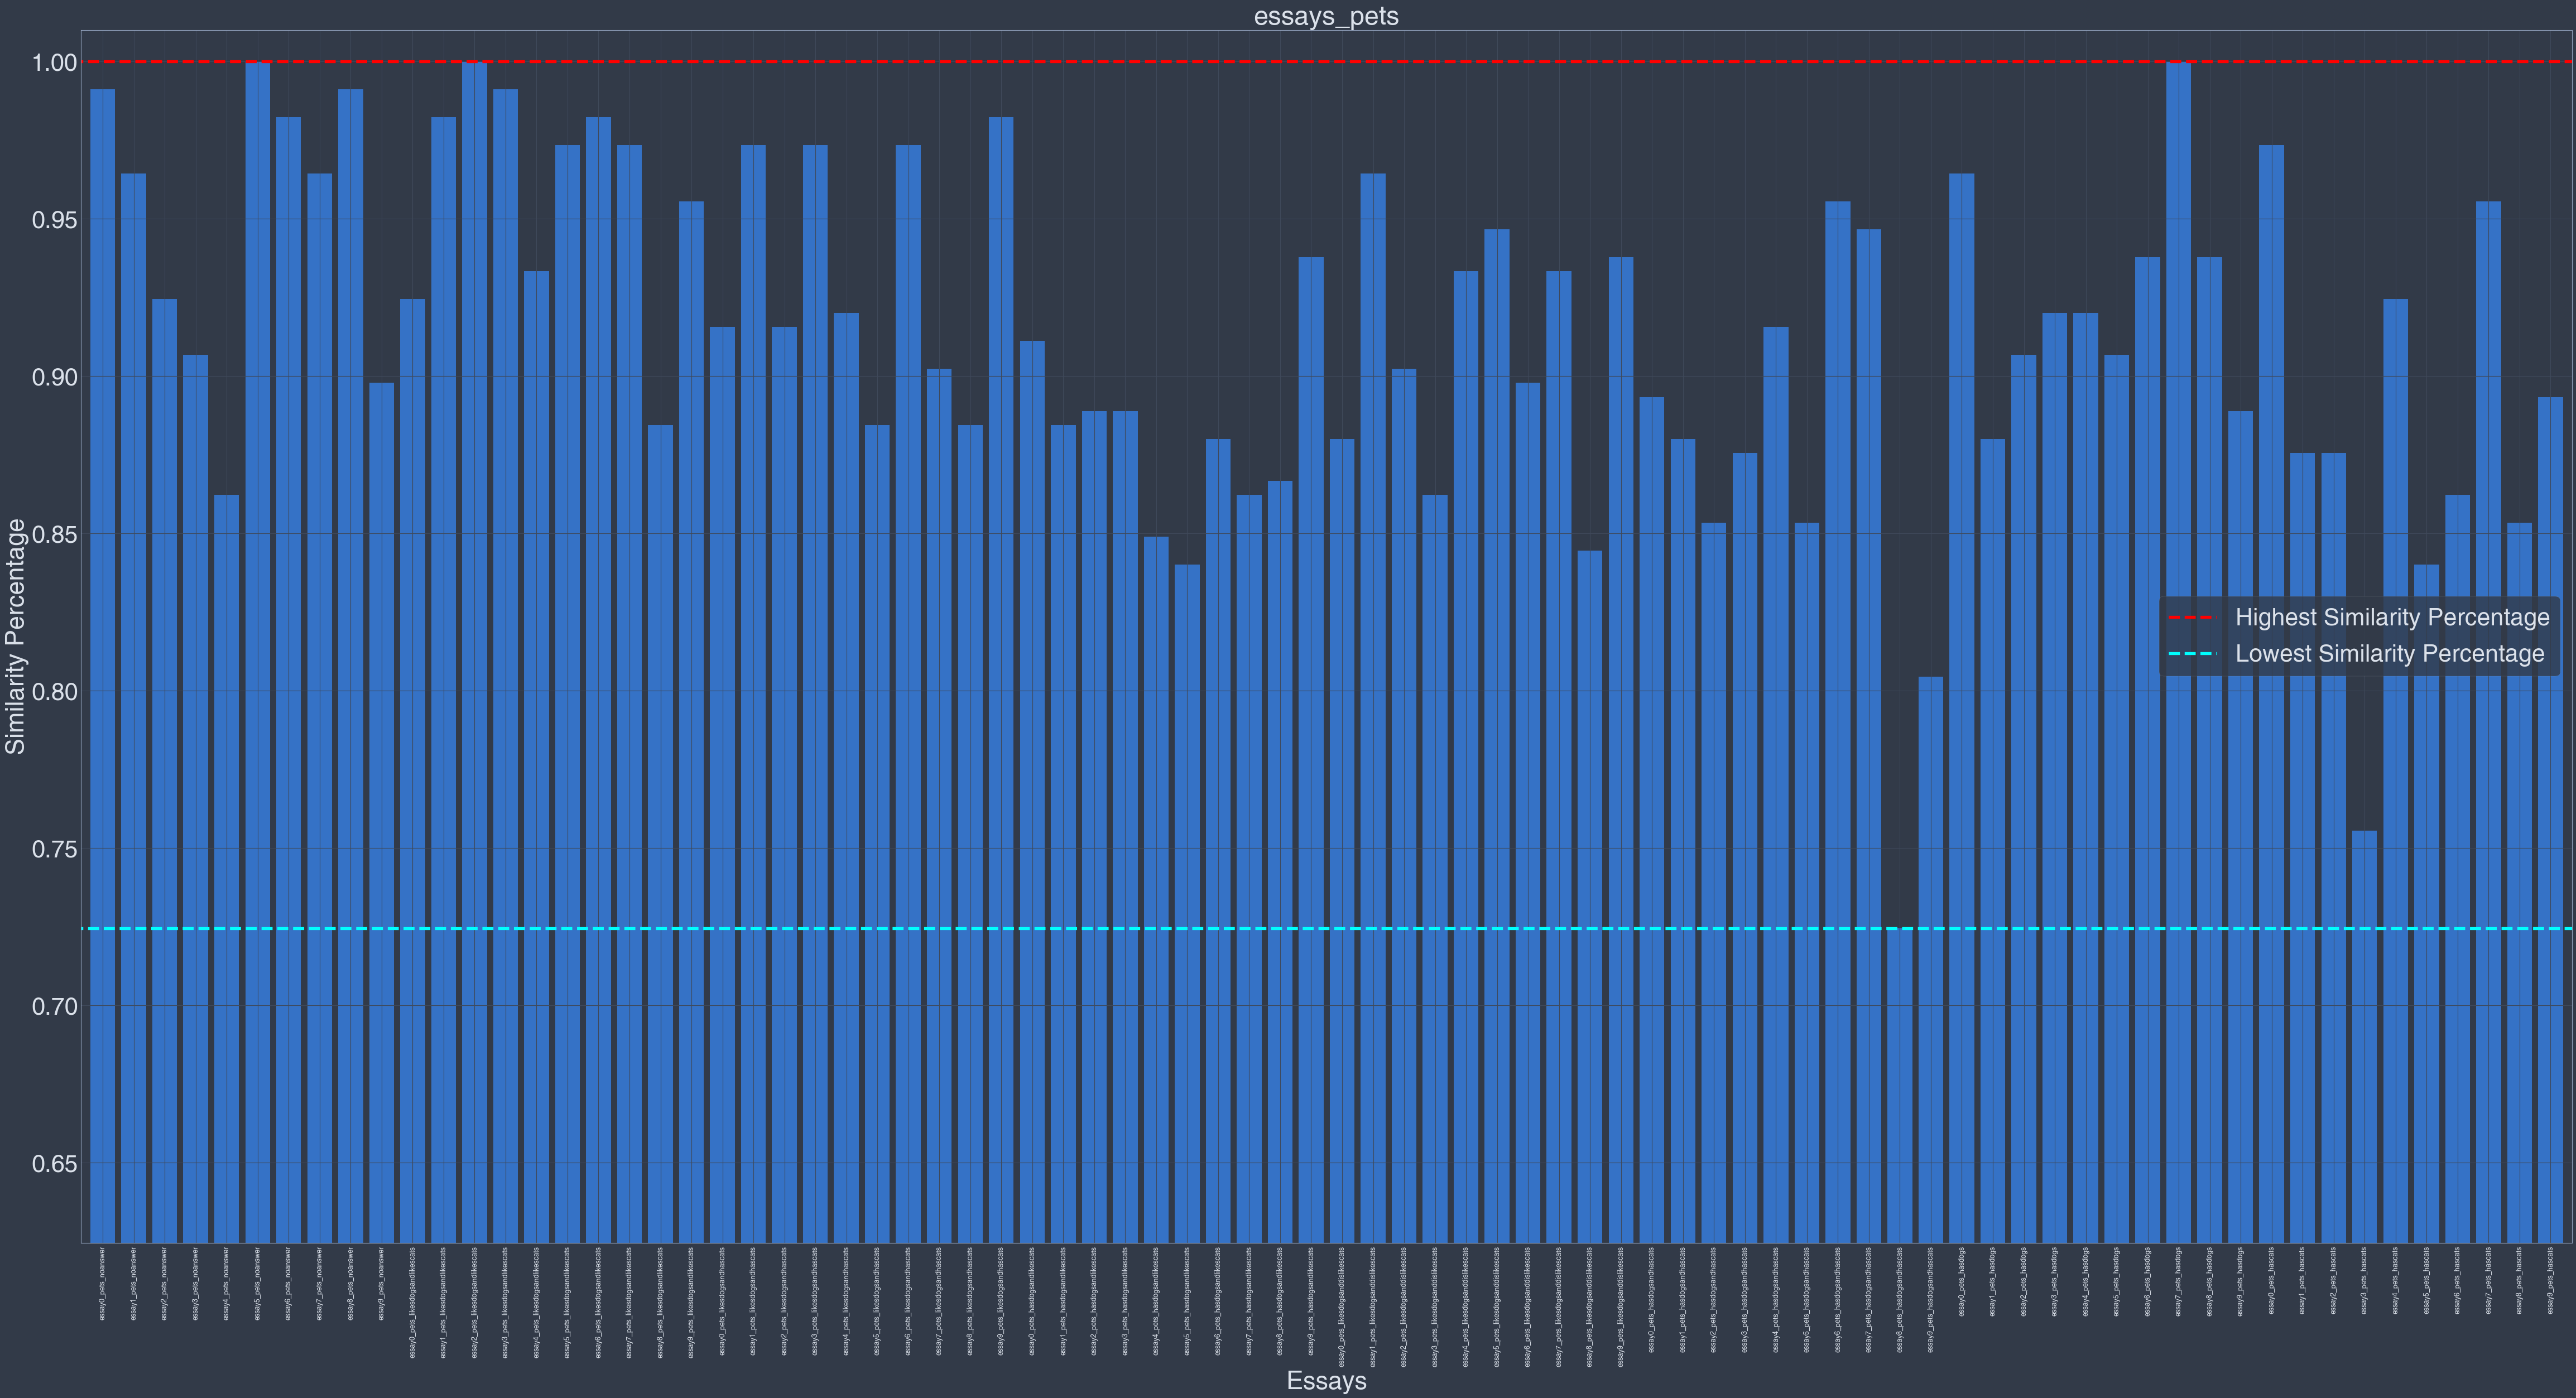

In [45]:
# Displays percentages results graph
sim_all_pets.graph()

### + Similarities between the 'all' and 'sex'-'pets' categories
Similarity percentages between set of two essay TF-IDF terms lists from the `Tfidf` instance `essays_all` and the `essays_sexes_pets`.

In [46]:
# Initializes 
sim_all_sexes_pets = Similarity_all(essays_sexes_pets, 'essays_sexes_pets')
# The highest percentsexes_pets 
sim_all_sexes_pets_highest, sim_all_sexes_pets_highest_terms = sim_all_sexes_pets.highest_sim()
display(sim_all_sexes_pets_highest.style.set_properties(**{'text-align': 'center'}),
        sim_all_sexes_pets_highest_terms.style.set_properties(**{'text-align': 'center'}))
# Displays the lowest percentsexes_pets
sim_all_sexes_pets_lowest, sim_all_sexes_pets_lowest_terms = sim_all_sexes_pets.lowest_sim()
display(sim_all_sexes_pets_lowest.style.set_properties(**{'text-align': 'center'}),
        sim_all_sexes_pets_lowest_terms.style.set_properties(**{'text-align': 'center'}))
# Saves the percentsexes_pets results
sim_all_sexes_pets.save_results()

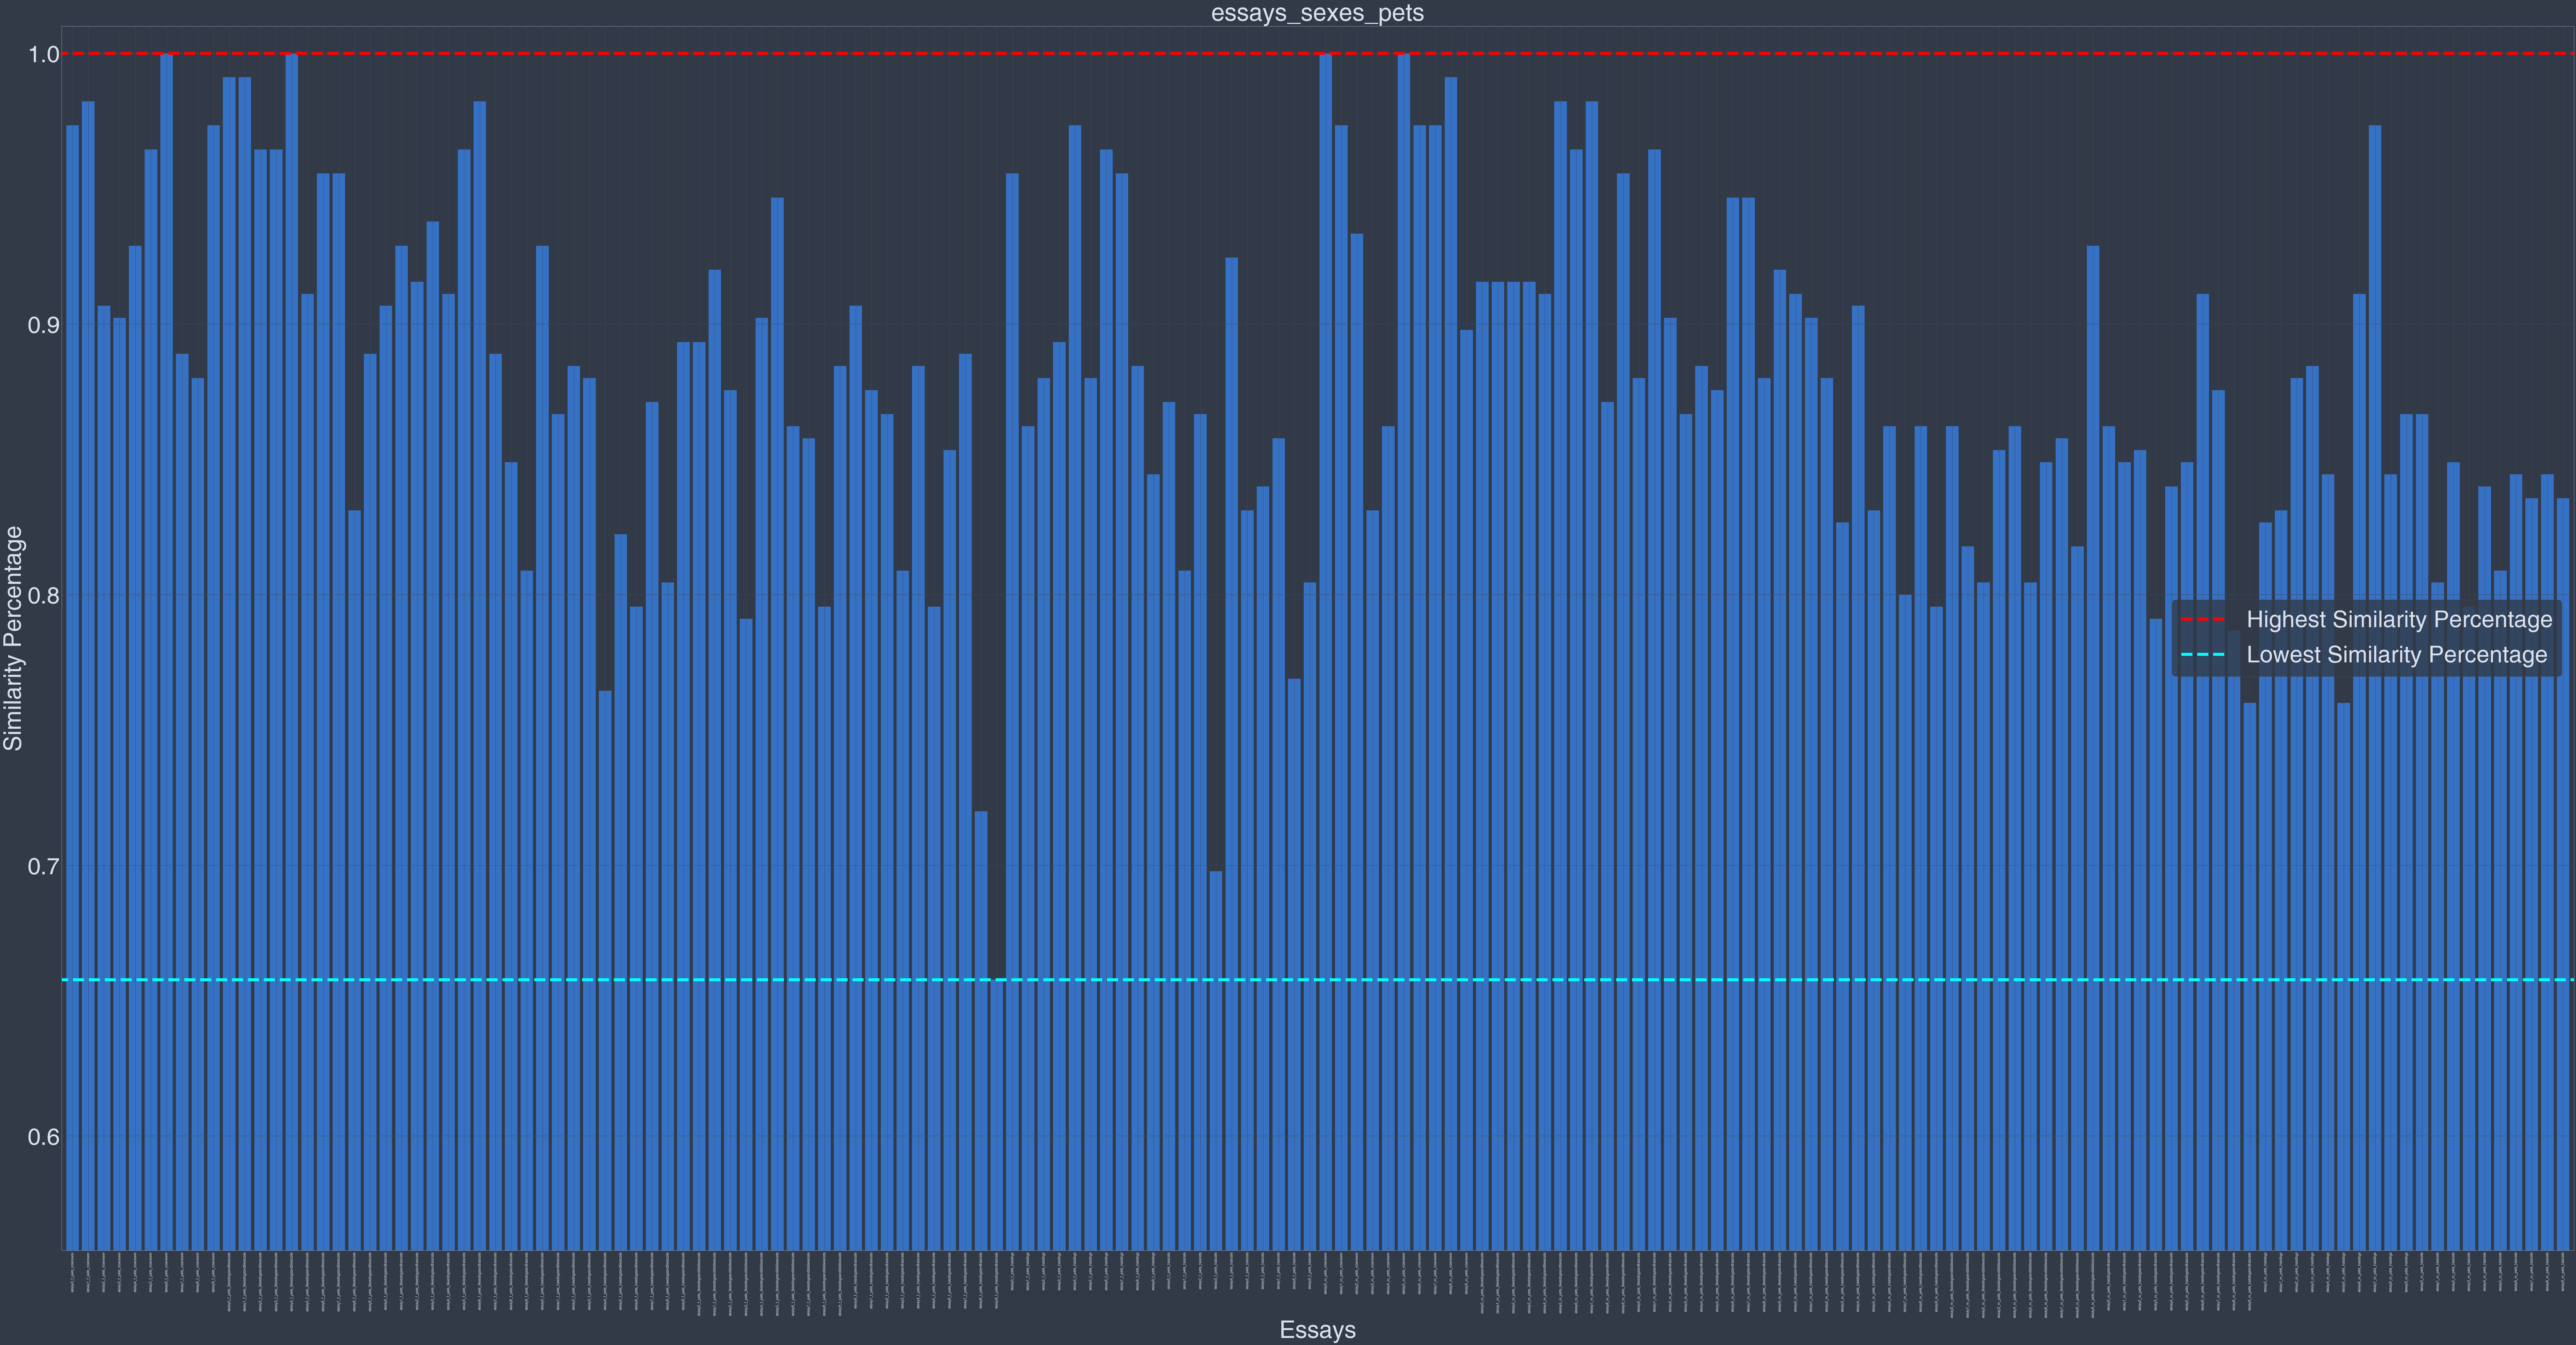

In [47]:
# Displays percentages results graph
sim_all_sexes_pets.graph()

 ### + End Section

In [48]:
profiles_nlp.close()